In [1]:
#Install package to read excel files
#By the time I realized there were csvs in the google drive, I had already figured out how to read the xlsx
#We can change this later if needed
!pip install openpyxl
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 20.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 22.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.0/970.0 KB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 39.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 87.7 MB/s eta 0:00:00
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=e001ae14366589a1bda1873115c010904bec97b8ecf2d66a241962bf37d085f6
  Stored in directory: /root/.cache/pip/wheels/17/f5/28/d3f6d4af74be0693f3e8994af3acb

In [2]:
#Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pingouin
from scipy.stats import chi2_contingency
import matplotlib.colors as mcolors

In [3]:
def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [4]:
# Load clean datasets which are excel files
df_fbi = pd.read_excel("clean_FBI_data.xlsx")
df_ggl = pd.read_csv("clean_google_trends_data_v4.csv")

In [5]:
#Confirming the FBI dataframe looks okay
df_fbi

data_year  boyfriend_girlfriend  spouse  ex_spouse  \
0         2004                  4151    4474        882   
1         2005                  5539    6074       1232   
2         2006                  7947    7791       1612   
3         2007                  8275    6903       1482   
4         2008                  8167    6218       1417   
..         ...                   ...     ...        ...   
122       2017                   773     256         69   
123       2018                   816     238         95   
124       2019                   809     289         91   
125       2020                   720     226         71   
126       2021                   724     218         78   

     homosexual_relationship    state state_abbrv  
0                        127    Texas          TX  
1                        161    Texas          TX  
2                        296    Texas          TX  
3                        271    Texas          TX  
4                        256    Texas          TX  
..                       ...      ...         ...  
122                        6  Vermont          VT  
123                        4  Vermont          VT  
124                        6  Vermont          VT  
125                        2  Vermont          VT  
126                        0  Vermont          VT  

[127 rows x 7 columns]

In [6]:
#Confirming the Google Trends dataframe looks okay
df_ggl

year  domestic_violence  handgun  rape  abuse  sexual_violence    state  \
0    2004                4.0      8.0  27.5   35.0              0.0    Texas   
1    2005                4.0      9.5  26.5   29.5              0.0    Texas   
2    2006                3.0      8.5  21.5   25.0              0.0    Texas   
3    2007                3.0      8.5  21.0   24.0              0.0    Texas   
4    2008                4.0      9.5  24.0   23.5              0.0    Texas   
..    ...                ...      ...   ...    ...              ...      ...   
139  2017                4.0      4.0  23.5   24.0              0.0  Vermont   
140  2018                5.5      4.0  20.0   24.5              0.0  Vermont   
141  2019                5.0      5.0  17.5   25.5              0.0  Vermont   
142  2020                3.0      6.0  18.0   21.0              0.0  Vermont   
143  2021                4.0      3.5  14.5   18.0              0.0  Vermont   

    state_abbrv  
0            TX  
1            TX  
2            TX  
3            TX  
4            TX  
..          ...  
139          VT  
140          VT  
141          VT  
142          VT  
143          VT  

[144 rows x 8 columns]

In [7]:
#Renaming the FBI column before merging
df_fbi.rename(columns={'data_year':'year'}, inplace=True)
df_fbi.head()

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0  2004                  4151    4474        882                      127   
1  2005                  5539    6074       1232                      161   
2  2006                  7947    7791       1612                      296   
3  2007                  8275    6903       1482                      271   
4  2008                  8167    6218       1417                      256   

   state state_abbrv  
0  Texas          TX  
1  Texas          TX  
2  Texas          TX  
3  Texas          TX  
4  Texas          TX

In [8]:
#Merging the FBI and Google Trends datasets
df_combined = pd.merge(df_fbi, df_ggl,  how='left', left_on=['year','state','state_abbrv'], right_on = ['year','state','state_abbrv'])
df_combined.head()

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0  2004                  4151    4474        882                      127   
1  2005                  5539    6074       1232                      161   
2  2006                  7947    7791       1612                      296   
3  2007                  8275    6903       1482                      271   
4  2008                  8167    6218       1417                      256   

   state state_abbrv  domestic_violence  handgun  rape  abuse  sexual_violence  
0  Texas          TX                4.0      8.0  27.5   35.0              0.0  
1  Texas          TX                4.0      9.5  26.5   29.5              0.0  
2  Texas          TX                3.0      8.5  21.5   25.0              0.0  
3  Texas          TX                3.0      8.5  21.0   24.0              0.0  
4  Texas          TX                4.0      9.5  24.0   23.5              0.0

In [9]:
#Create a new column for total crime incidents (addition of the four relationships indicative of DV)
dv_relshp = ['boyfriend_girlfriend','spouse','ex_spouse','homosexual_relationship']
df_combined['dv_total'] = df_combined[dv_relshp].sum(axis=1) 
#axis =1 means we sum along the rows

df_combined

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0    2004                  4151    4474        882                      127   
1    2005                  5539    6074       1232                      161   
2    2006                  7947    7791       1612                      296   
3    2007                  8275    6903       1482                      271   
4    2008                  8167    6218       1417                      256   
..    ...                   ...     ...        ...                      ...   
122  2017                   773     256         69                        6   
123  2018                   816     238         95                        4   
124  2019                   809     289         91                        6   
125  2020                   720     226         71                        2   
126  2021                   724     218         78                        0   

       state state_abbrv  domestic_violence  handgun  rape  abuse  \
0      Texas          TX                4.0      8.0  27.5   35.0   
1      Texas          TX                4.0      9.5  26.5   29.5   
2      Texas          TX                3.0      8.5  21.5   25.0   
3      Texas          TX                3.0      8.5  21.0   24.0   
4      Texas          TX                4.0      9.5  24.0   23.5   
..       ...         ...                ...      ...   ...    ...   
122  Vermont          VT                4.0      4.0  23.5   24.0   
123  Vermont          VT                5.5      4.0  20.0   24.5   
124  Vermont          VT                5.0      5.0  17.5   25.5   
125  Vermont          VT                3.0      6.0  18.0   21.0   
126  Vermont          VT                4.0      3.5  14.5   18.0   

     sexual_violence  dv_total  
0                0.0      9634  
1                0.0     13006  
2                0.0     17646  
3                0.0     16931  
4                0.0     16058  
..               ...       ...  
122              0.0      1104  
123              0.0      1153  
124              0.0      1195  
125              0.0      1019  
126              0.0      1020  

[127 rows x 13 columns]

In [10]:
#Create a new column for total crime incidents (addition of the four relationships indicative of DV)
df_combined['dv_total'] = df_combined['boyfriend_girlfriend'] + df_combined['spouse'] + df_combined['ex_spouse'] + df_combined['homosexual_relationship']
df_combined.head()

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0  2004                  4151    4474        882                      127   
1  2005                  5539    6074       1232                      161   
2  2006                  7947    7791       1612                      296   
3  2007                  8275    6903       1482                      271   
4  2008                  8167    6218       1417                      256   

   state state_abbrv  domestic_violence  handgun  rape  abuse  \
0  Texas          TX                4.0      8.0  27.5   35.0   
1  Texas          TX                4.0      9.5  26.5   29.5   
2  Texas          TX                3.0      8.5  21.5   25.0   
3  Texas          TX                3.0      8.5  21.0   24.0   
4  Texas          TX                4.0      9.5  24.0   23.5   

   sexual_violence  dv_total  
0              0.0      9634  
1              0.0     13006  
2              0.0     17646  
3              0.0     16931  
4              0.0     16058

In [11]:
#Create a new column for total search value (addition of the search values for the five terms indicative of DV)
#This uses a different way to find the total from the previous cell
dv_terms = ['domestic_violence', 'handgun', 'rape', 'abuse', 'sexual_violence']
df_combined['search_total'] = df_combined[dv_terms].sum(axis=1) 
#axis =1 means we sum along the rows
df_combined.head()
# note from TA: Divide google search number by 12

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0  2004                  4151    4474        882                      127   
1  2005                  5539    6074       1232                      161   
2  2006                  7947    7791       1612                      296   
3  2007                  8275    6903       1482                      271   
4  2008                  8167    6218       1417                      256   

   state state_abbrv  domestic_violence  handgun  rape  abuse  \
0  Texas          TX                4.0      8.0  27.5   35.0   
1  Texas          TX                4.0      9.5  26.5   29.5   
2  Texas          TX                3.0      8.5  21.5   25.0   
3  Texas          TX                3.0      8.5  21.0   24.0   
4  Texas          TX                4.0      9.5  24.0   23.5   

   sexual_violence  dv_total  search_total  
0              0.0      9634          74.5  
1              0.0     13006          69.5  
2              0.0     17646          58.0  
3              0.0     16931          56.5  
4              0.0     16058          61.0

In [12]:
#Create a new column for state population type (high vs low) per https://worldpopulationreview.com/states

pop_dict = {'Texas': 'high_pop',
 'Illinois': 'high_pop',
 'Alaska': 'low_pop',
 'North Dakota': 'low_pop',
 'Minnesota': 'mid_pop',
 'Michigan': 'high_cri',
 'Tennessee': 'high_cri',
 'Vermont': 'low_pop'}


df_combined["pop_category"] = df_combined["state"]
df_combined["pop_category"] = df_combined["pop_category"].replace(pop_dict)

df_combined.head()

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0  2004                  4151    4474        882                      127   
1  2005                  5539    6074       1232                      161   
2  2006                  7947    7791       1612                      296   
3  2007                  8275    6903       1482                      271   
4  2008                  8167    6218       1417                      256   

   state state_abbrv  domestic_violence  handgun  rape  abuse  \
0  Texas          TX                4.0      8.0  27.5   35.0   
1  Texas          TX                4.0      9.5  26.5   29.5   
2  Texas          TX                3.0      8.5  21.5   25.0   
3  Texas          TX                3.0      8.5  21.0   24.0   
4  Texas          TX                4.0      9.5  24.0   23.5   

   sexual_violence  dv_total  search_total pop_category  
0              0.0      9634          74.5     high_pop  
1              0.0     13006          69.5     high_pop  
2              0.0     17646          58.0     high_pop  
3              0.0     16931          56.5     high_pop  
4              0.0     16058          61.0     high_pop

In [13]:
#Change the year type to datetime, which could make our plots prettier (the graphs had years with decimals at some point)
df_combined['year2'] = pd.to_datetime(df_combined['year'],format='%Y')
df_combined

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0    2004                  4151    4474        882                      127   
1    2005                  5539    6074       1232                      161   
2    2006                  7947    7791       1612                      296   
3    2007                  8275    6903       1482                      271   
4    2008                  8167    6218       1417                      256   
..    ...                   ...     ...        ...                      ...   
122  2017                   773     256         69                        6   
123  2018                   816     238         95                        4   
124  2019                   809     289         91                        6   
125  2020                   720     226         71                        2   
126  2021                   724     218         78                        0   

       state state_abbrv  domestic_violence  handgun  rape  abuse  \
0      Texas          TX                4.0      8.0  27.5   35.0   
1      Texas          TX                4.0      9.5  26.5   29.5   
2      Texas          TX                3.0      8.5  21.5   25.0   
3      Texas          TX                3.0      8.5  21.0   24.0   
4      Texas          TX                4.0      9.5  24.0   23.5   
..       ...         ...                ...      ...   ...    ...   
122  Vermont          VT                4.0      4.0  23.5   24.0   
123  Vermont          VT                5.5      4.0  20.0   24.5   
124  Vermont          VT                5.0      5.0  17.5   25.5   
125  Vermont          VT                3.0      6.0  18.0   21.0   
126  Vermont          VT                4.0      3.5  14.5   18.0   

     sexual_violence  dv_total  search_total pop_category      year2  
0                0.0      9634          74.5     high_pop 2004-01-01  
1                0.0     13006          69.5     high_pop 2005-01-01  
2                0.0     17646          58.0     high_pop 2006-01-01  
3                0.0     16931          56.5     high_pop 2007-01-01  
4                0.0     16058          61.0     high_pop 2008-01-01  
..               ...       ...           ...          ...        ...  
122              0.0      1104          55.5      low_pop 2017-01-01  
123              0.0      1153          54.0      low_pop 2018-01-01  
124              0.0      1195          53.0      low_pop 2019-01-01  
125              0.0      1019          48.0      low_pop 2020-01-01  
126              0.0      1020          40.0      low_pop 2021-01-01  

[127 rows x 16 columns]

In [14]:
index = df_combined[df_combined['state'] == 'Alaska'].index
df_combined = df_combined.drop(index=index)

### FBI Crime Domestic Violence Relationships numbers by year and state

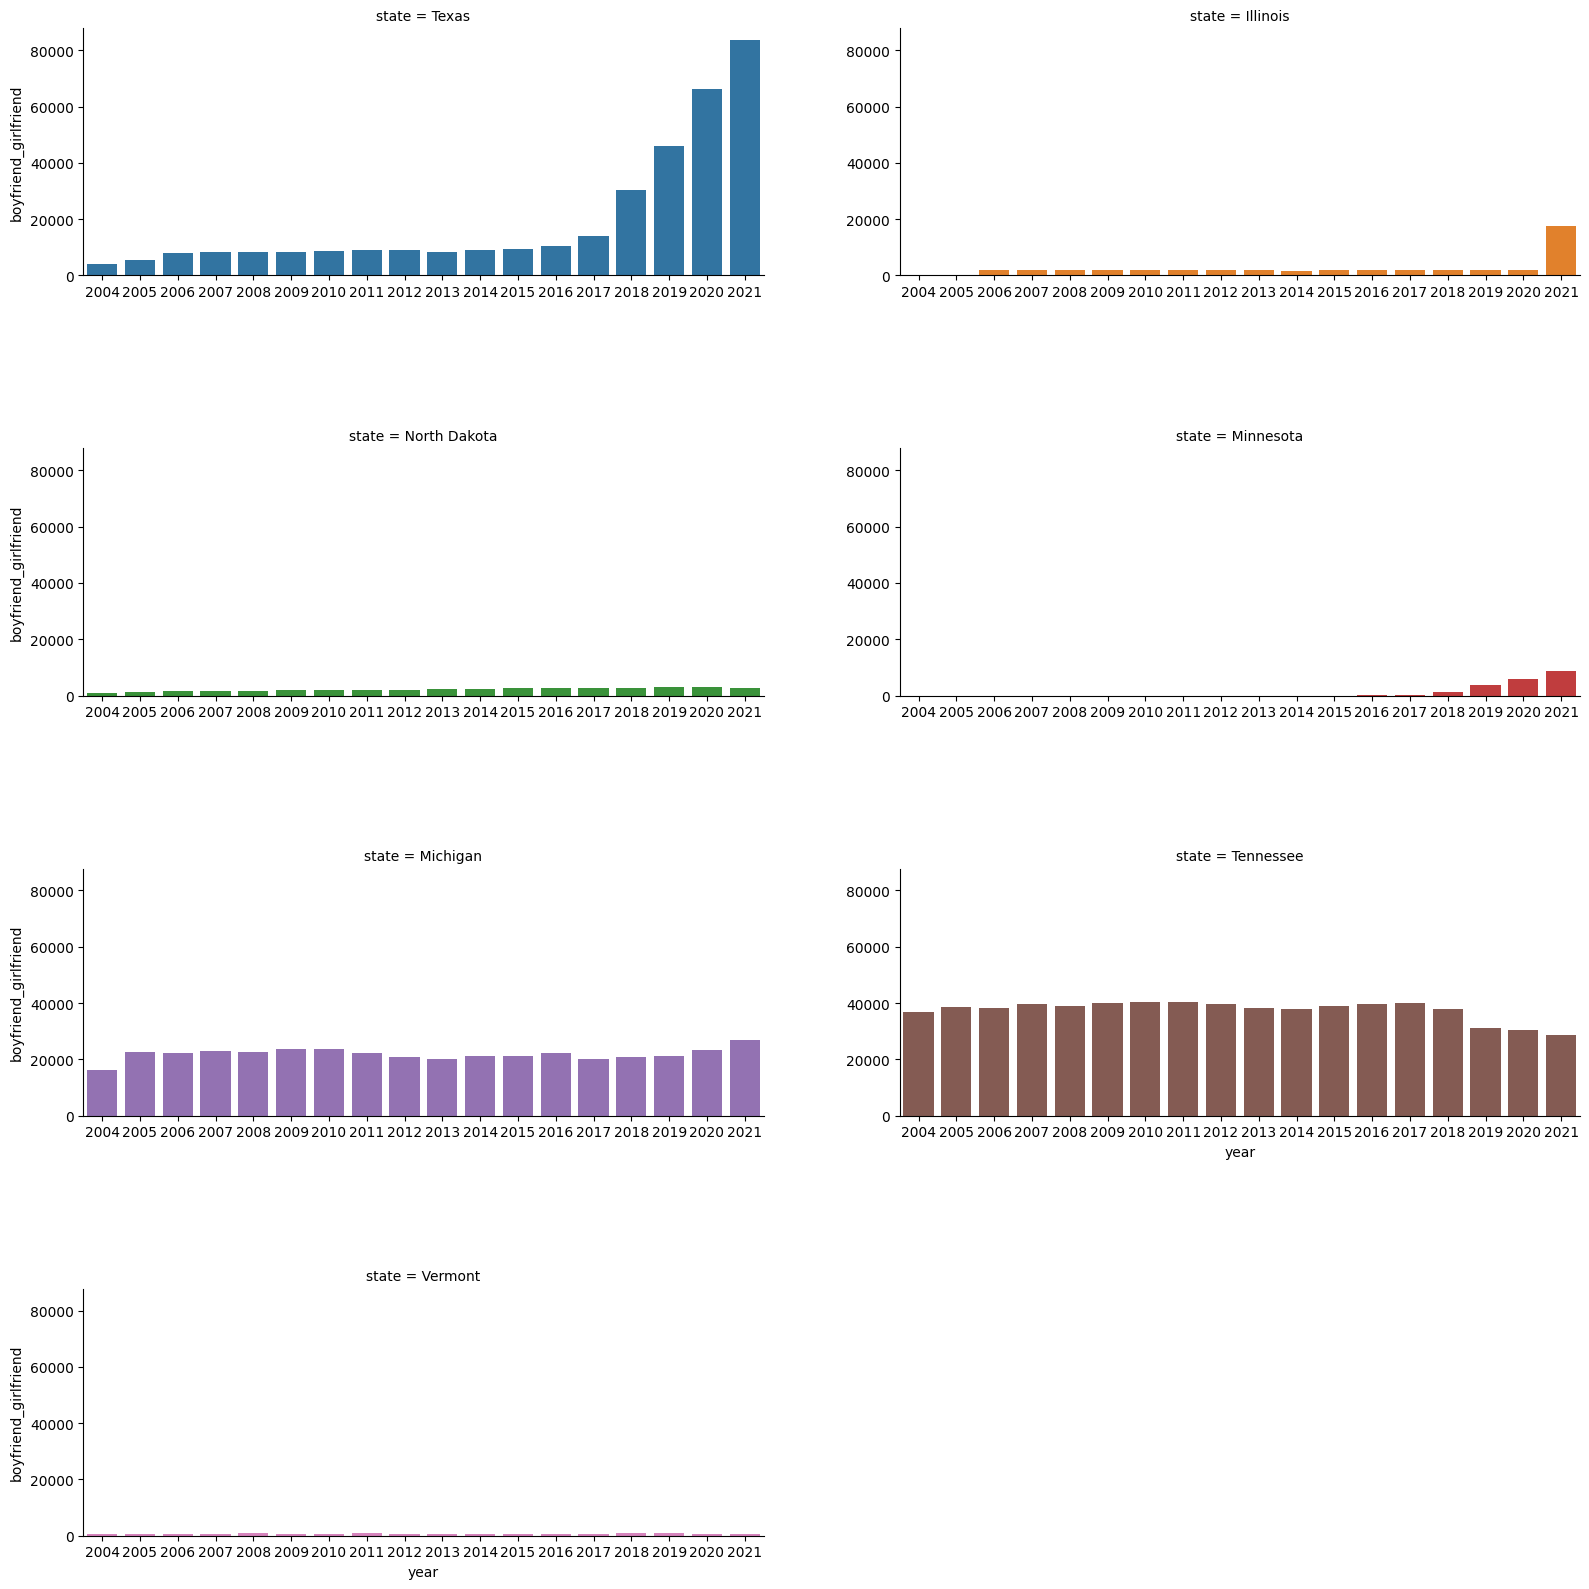

In [15]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "boyfriend_girlfriend")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

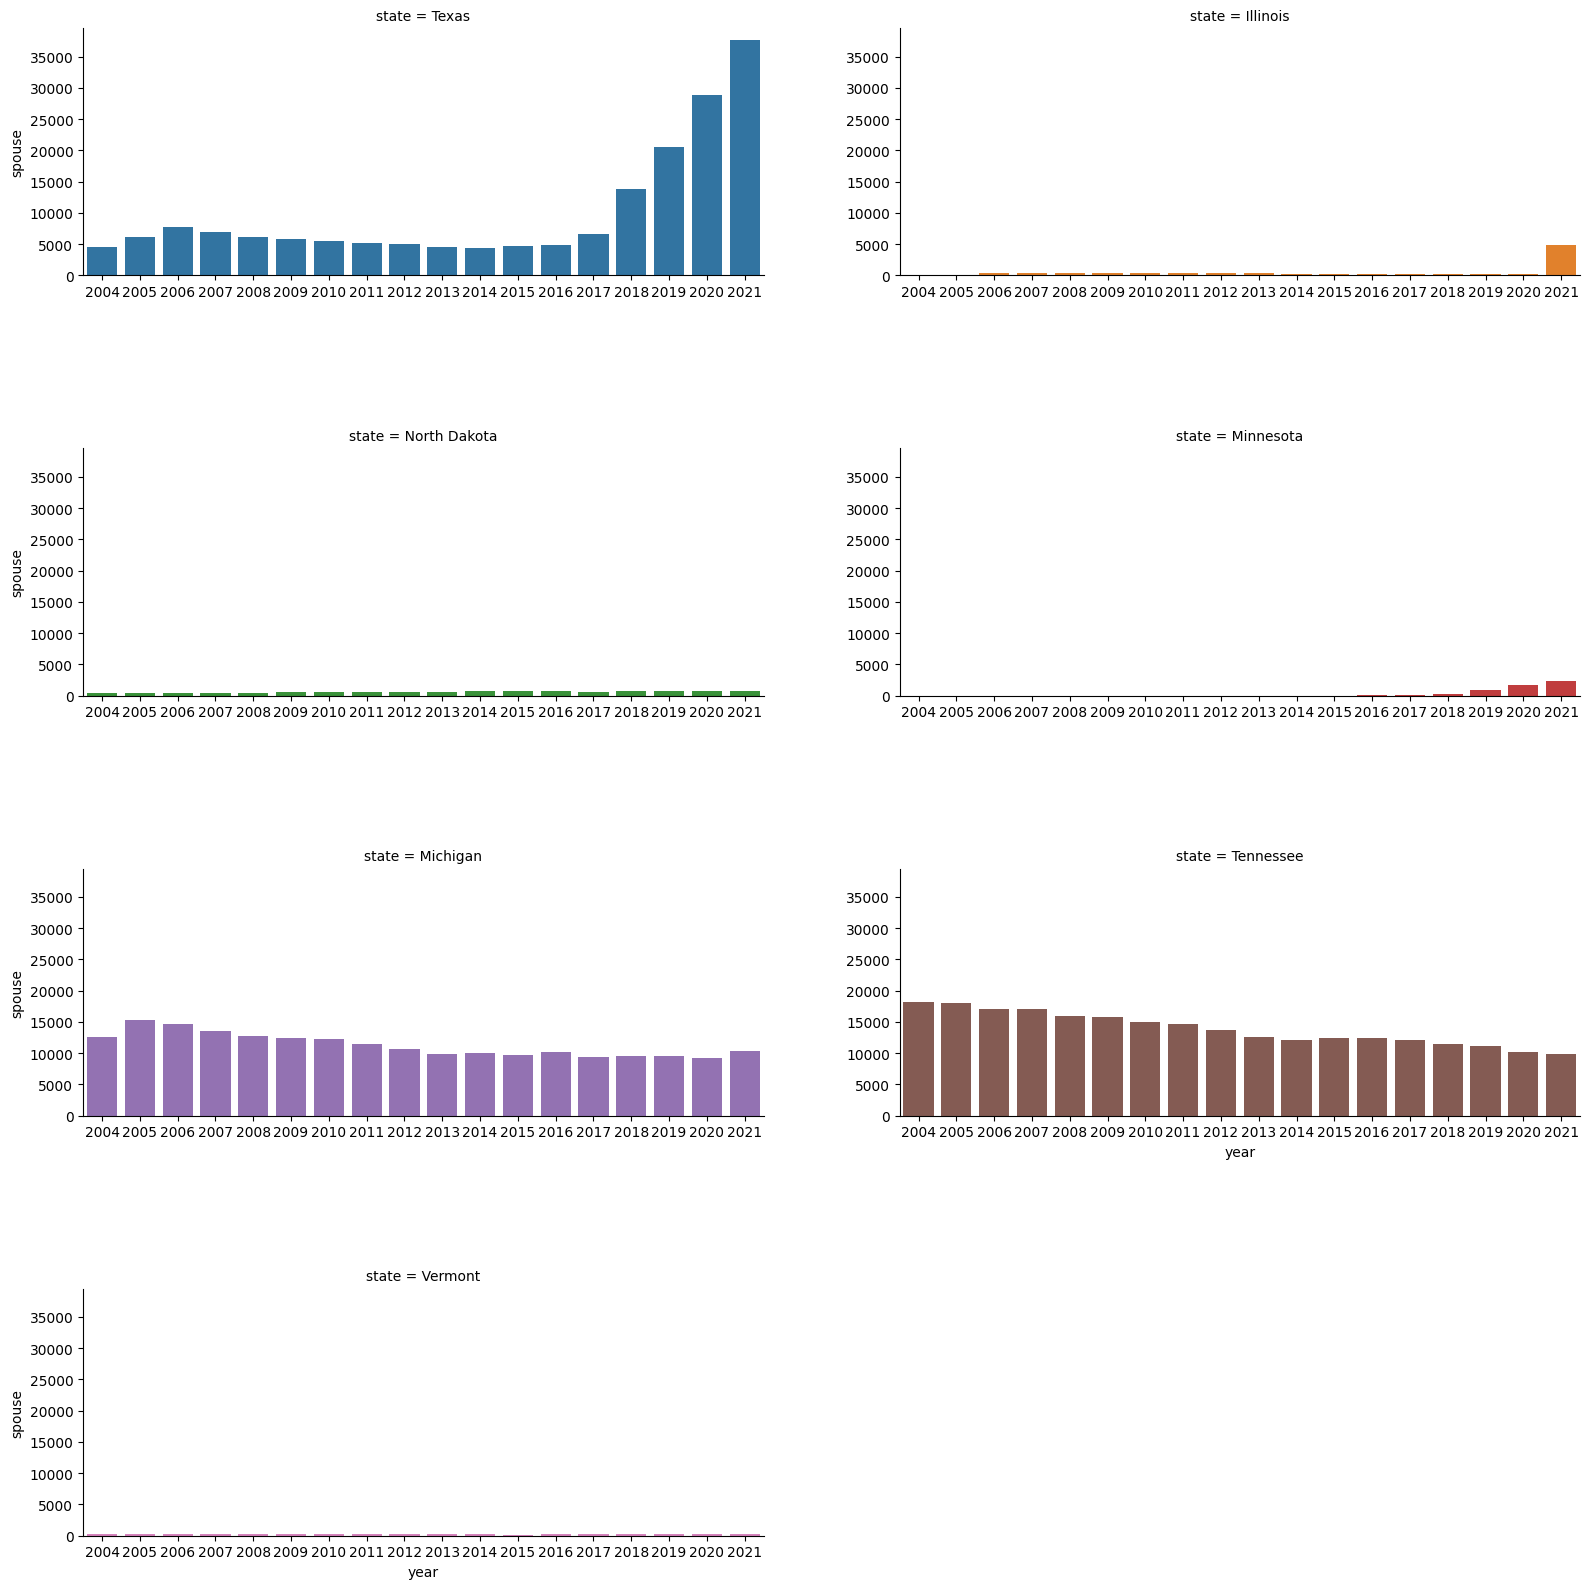

In [16]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "spouse")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

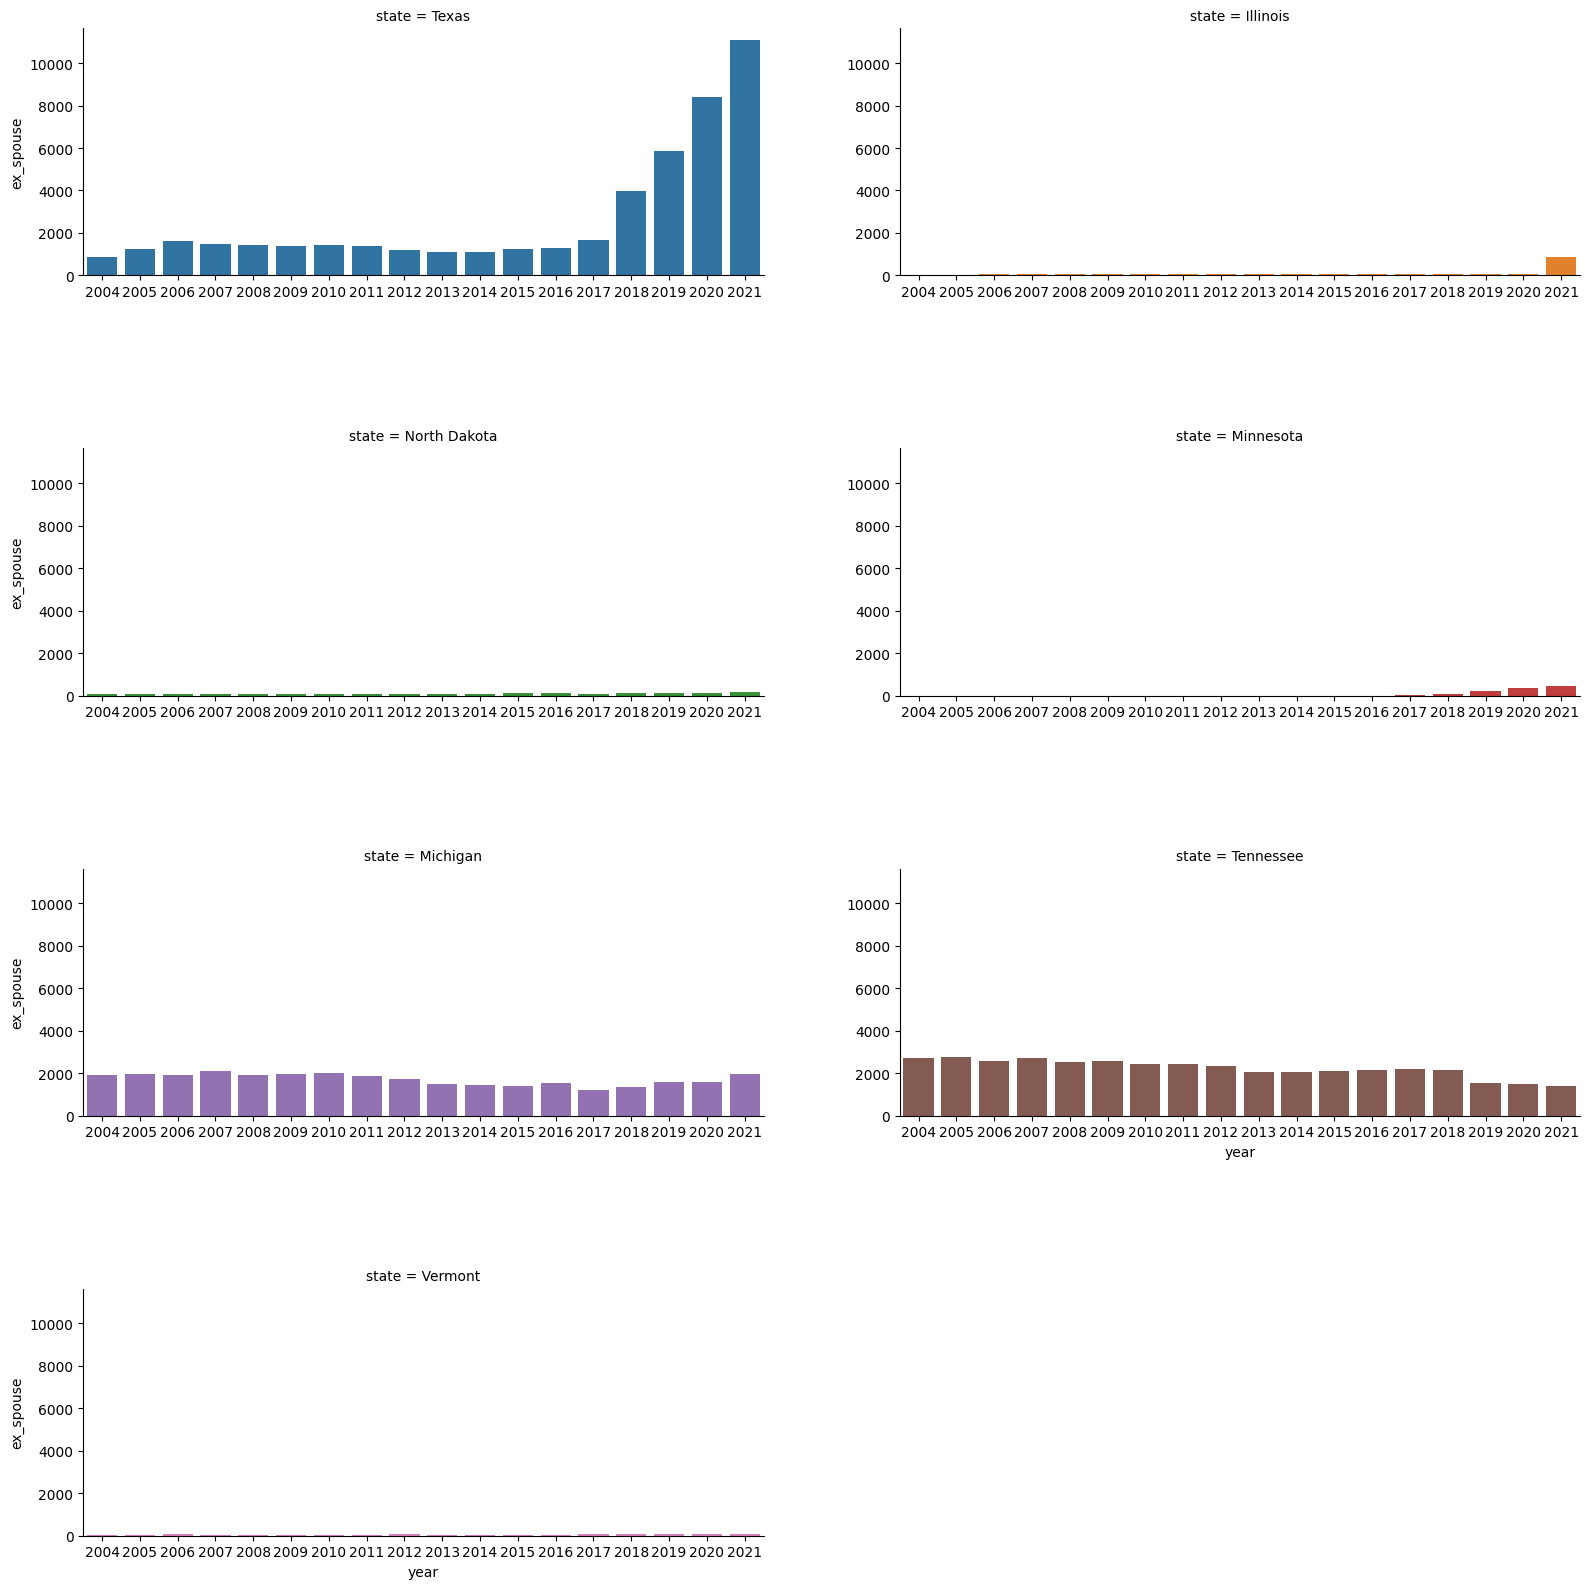

In [17]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "ex_spouse")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

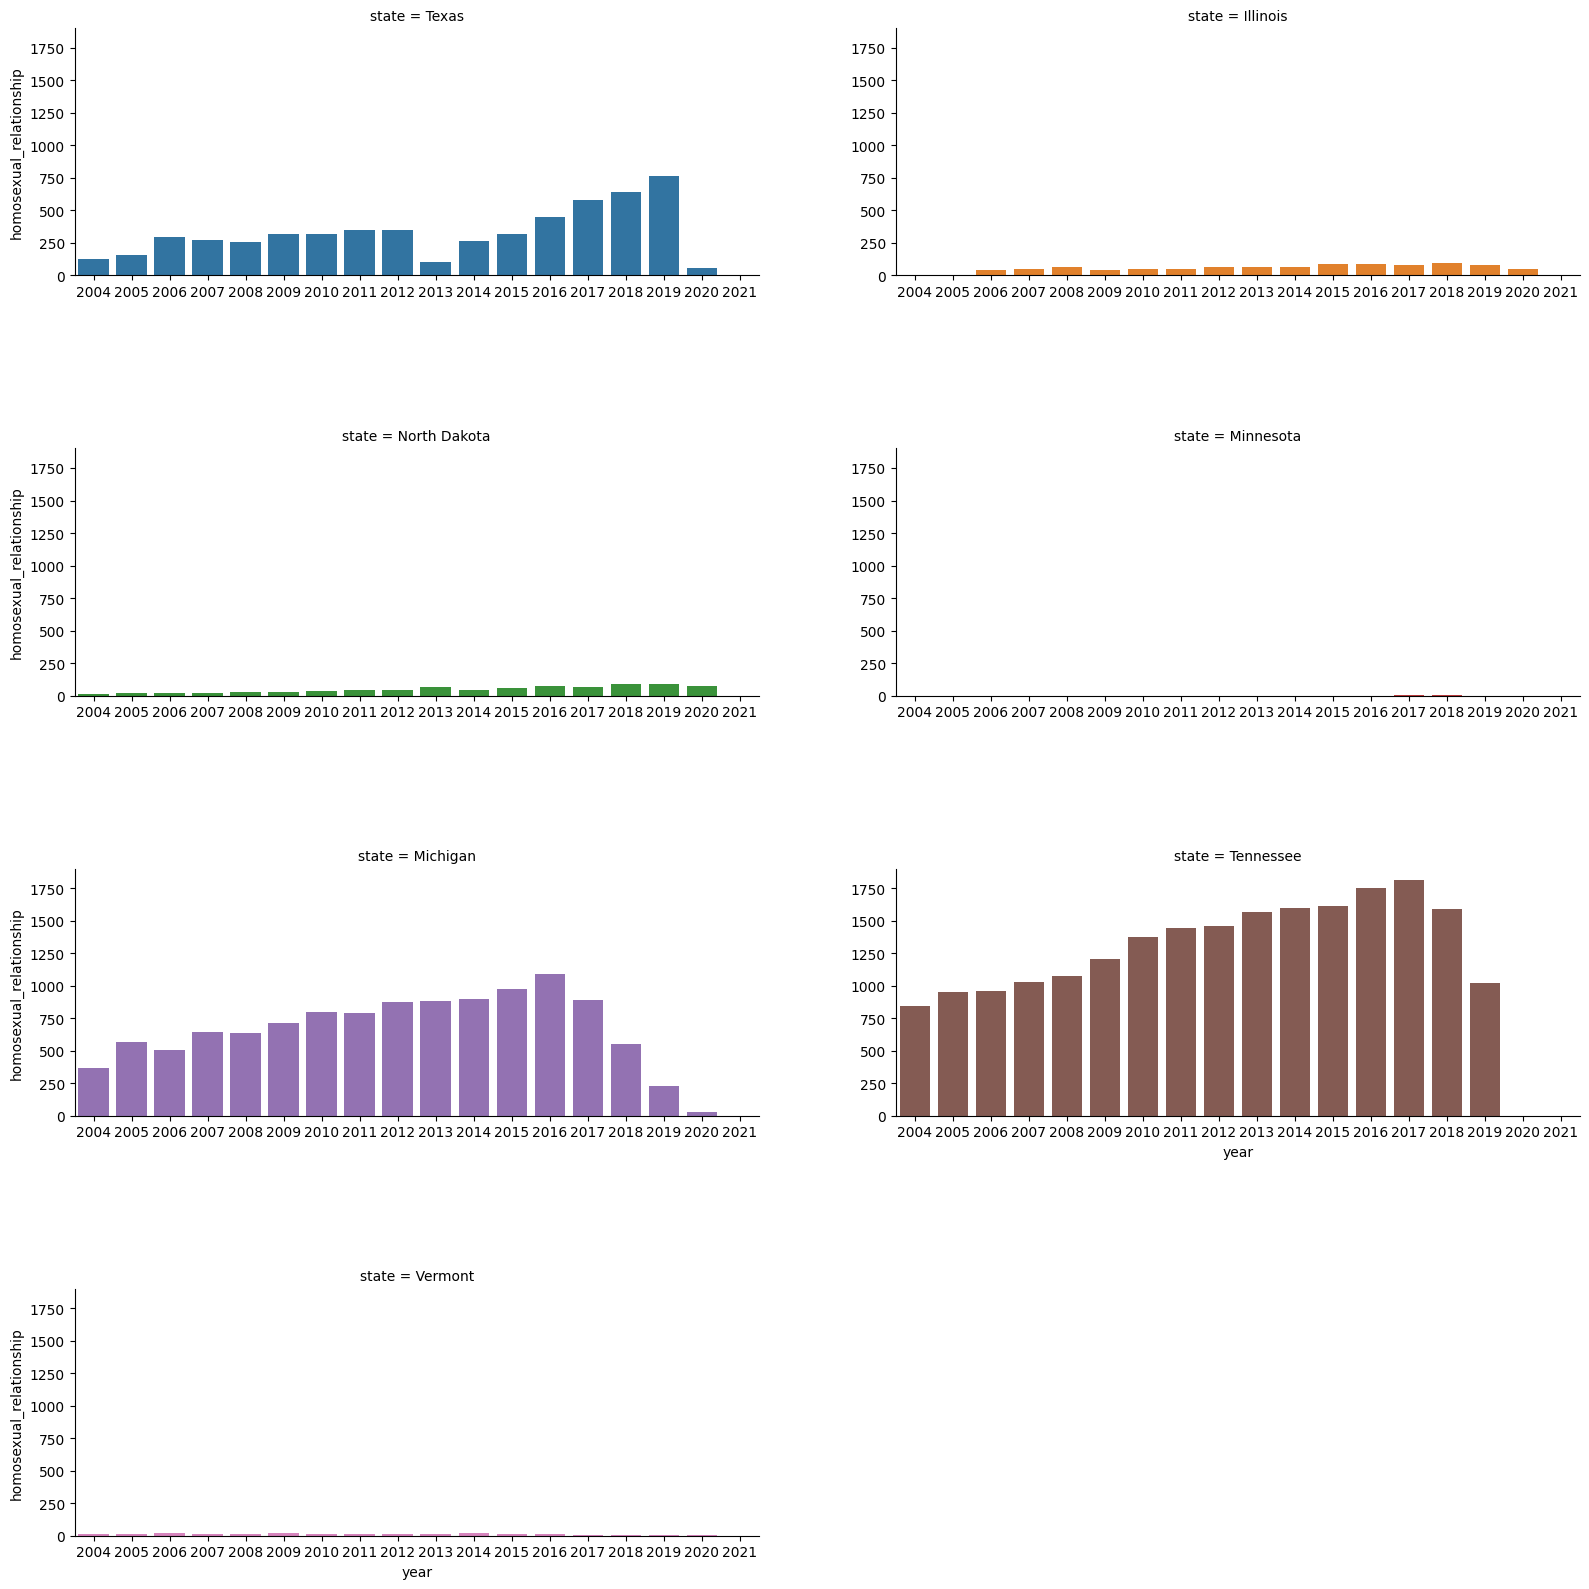

In [18]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "homosexual_relationship")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

### Google trends Domestic Violence search terms rate numbers by year and state

In [19]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "domestic_violence")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)


In [20]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "rape")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

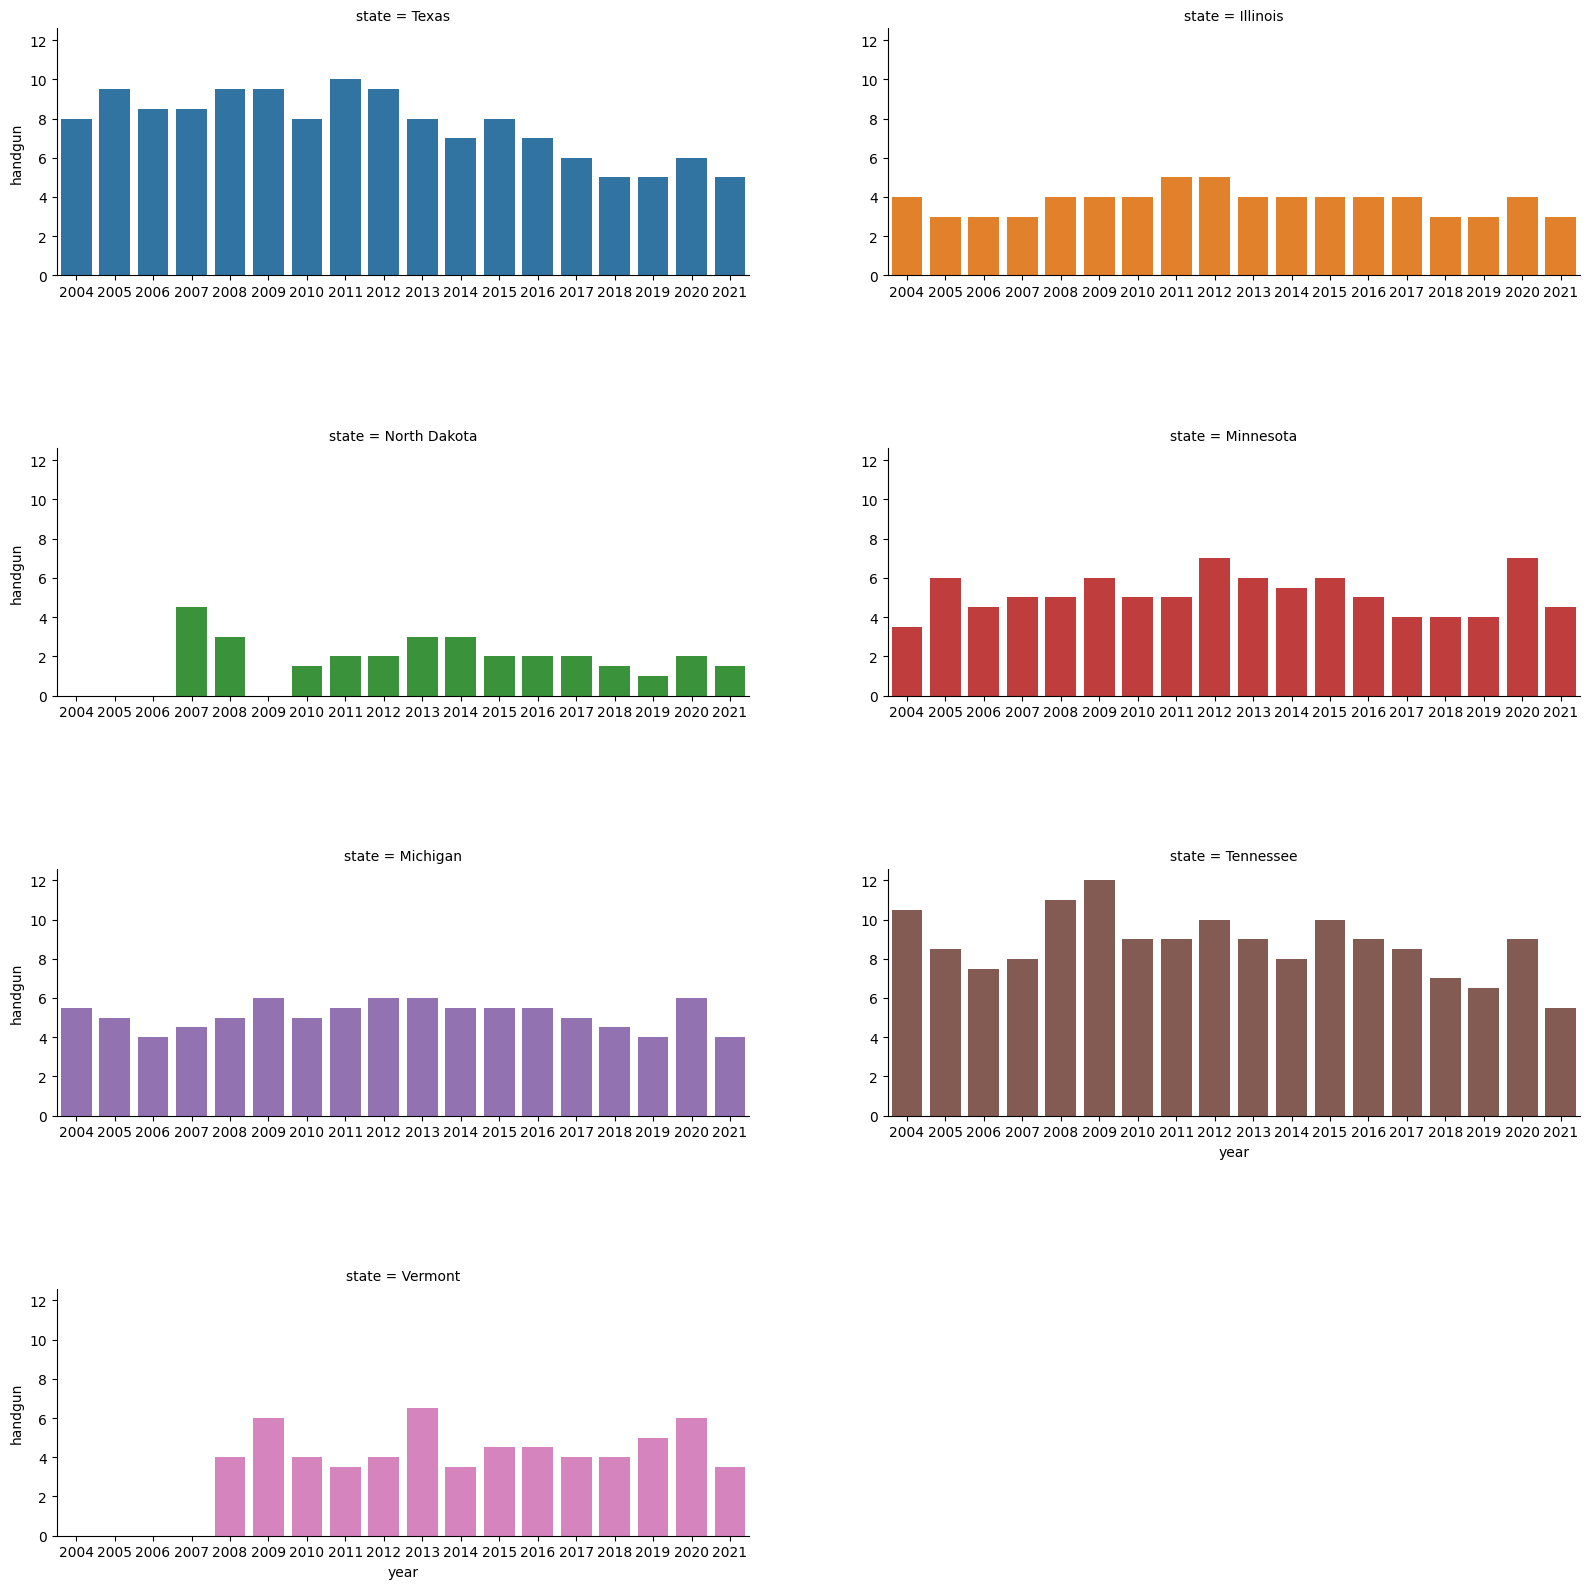

In [21]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "handgun")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

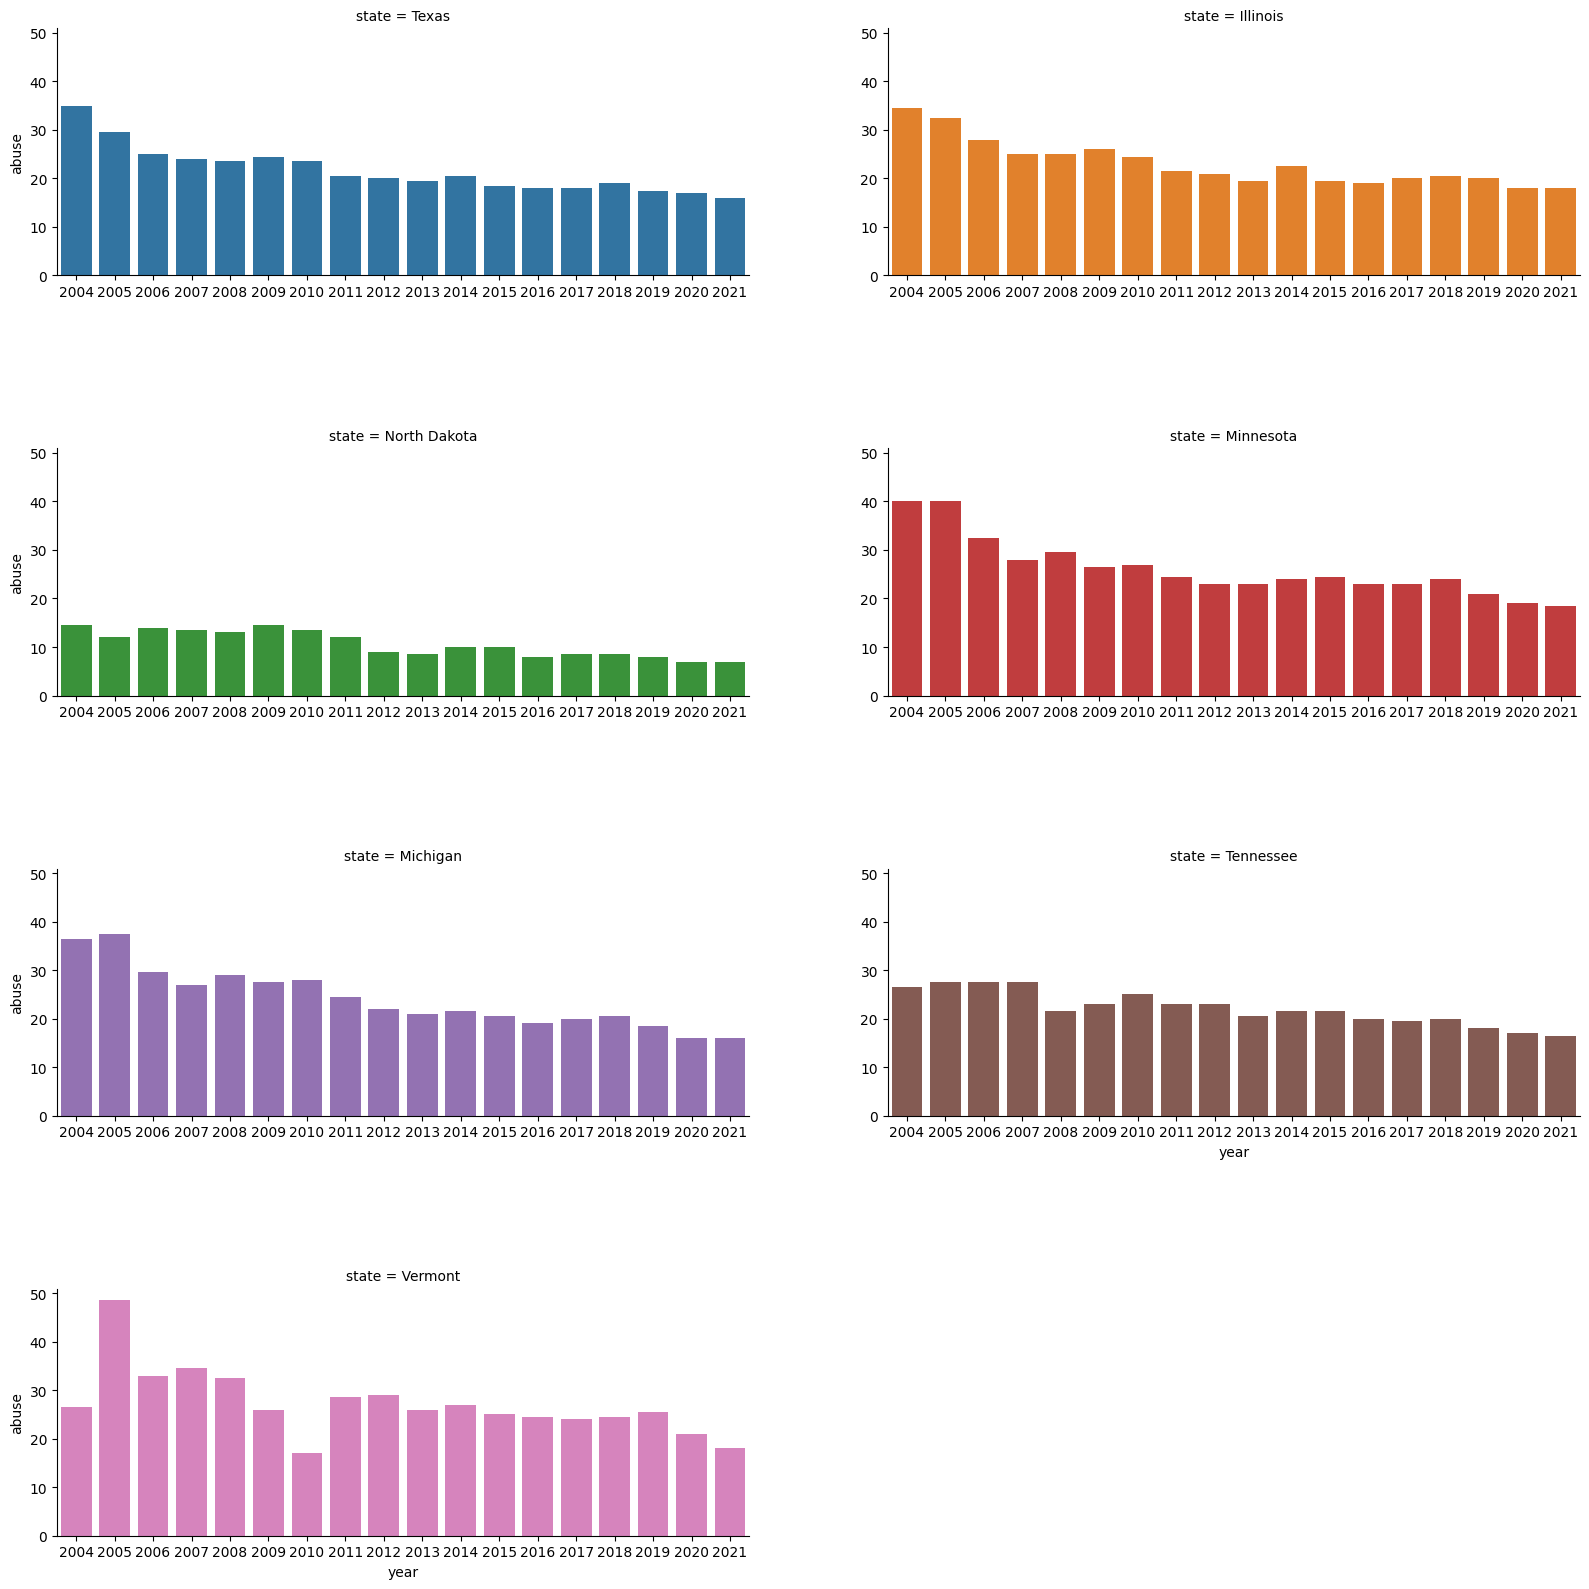

In [22]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "abuse")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

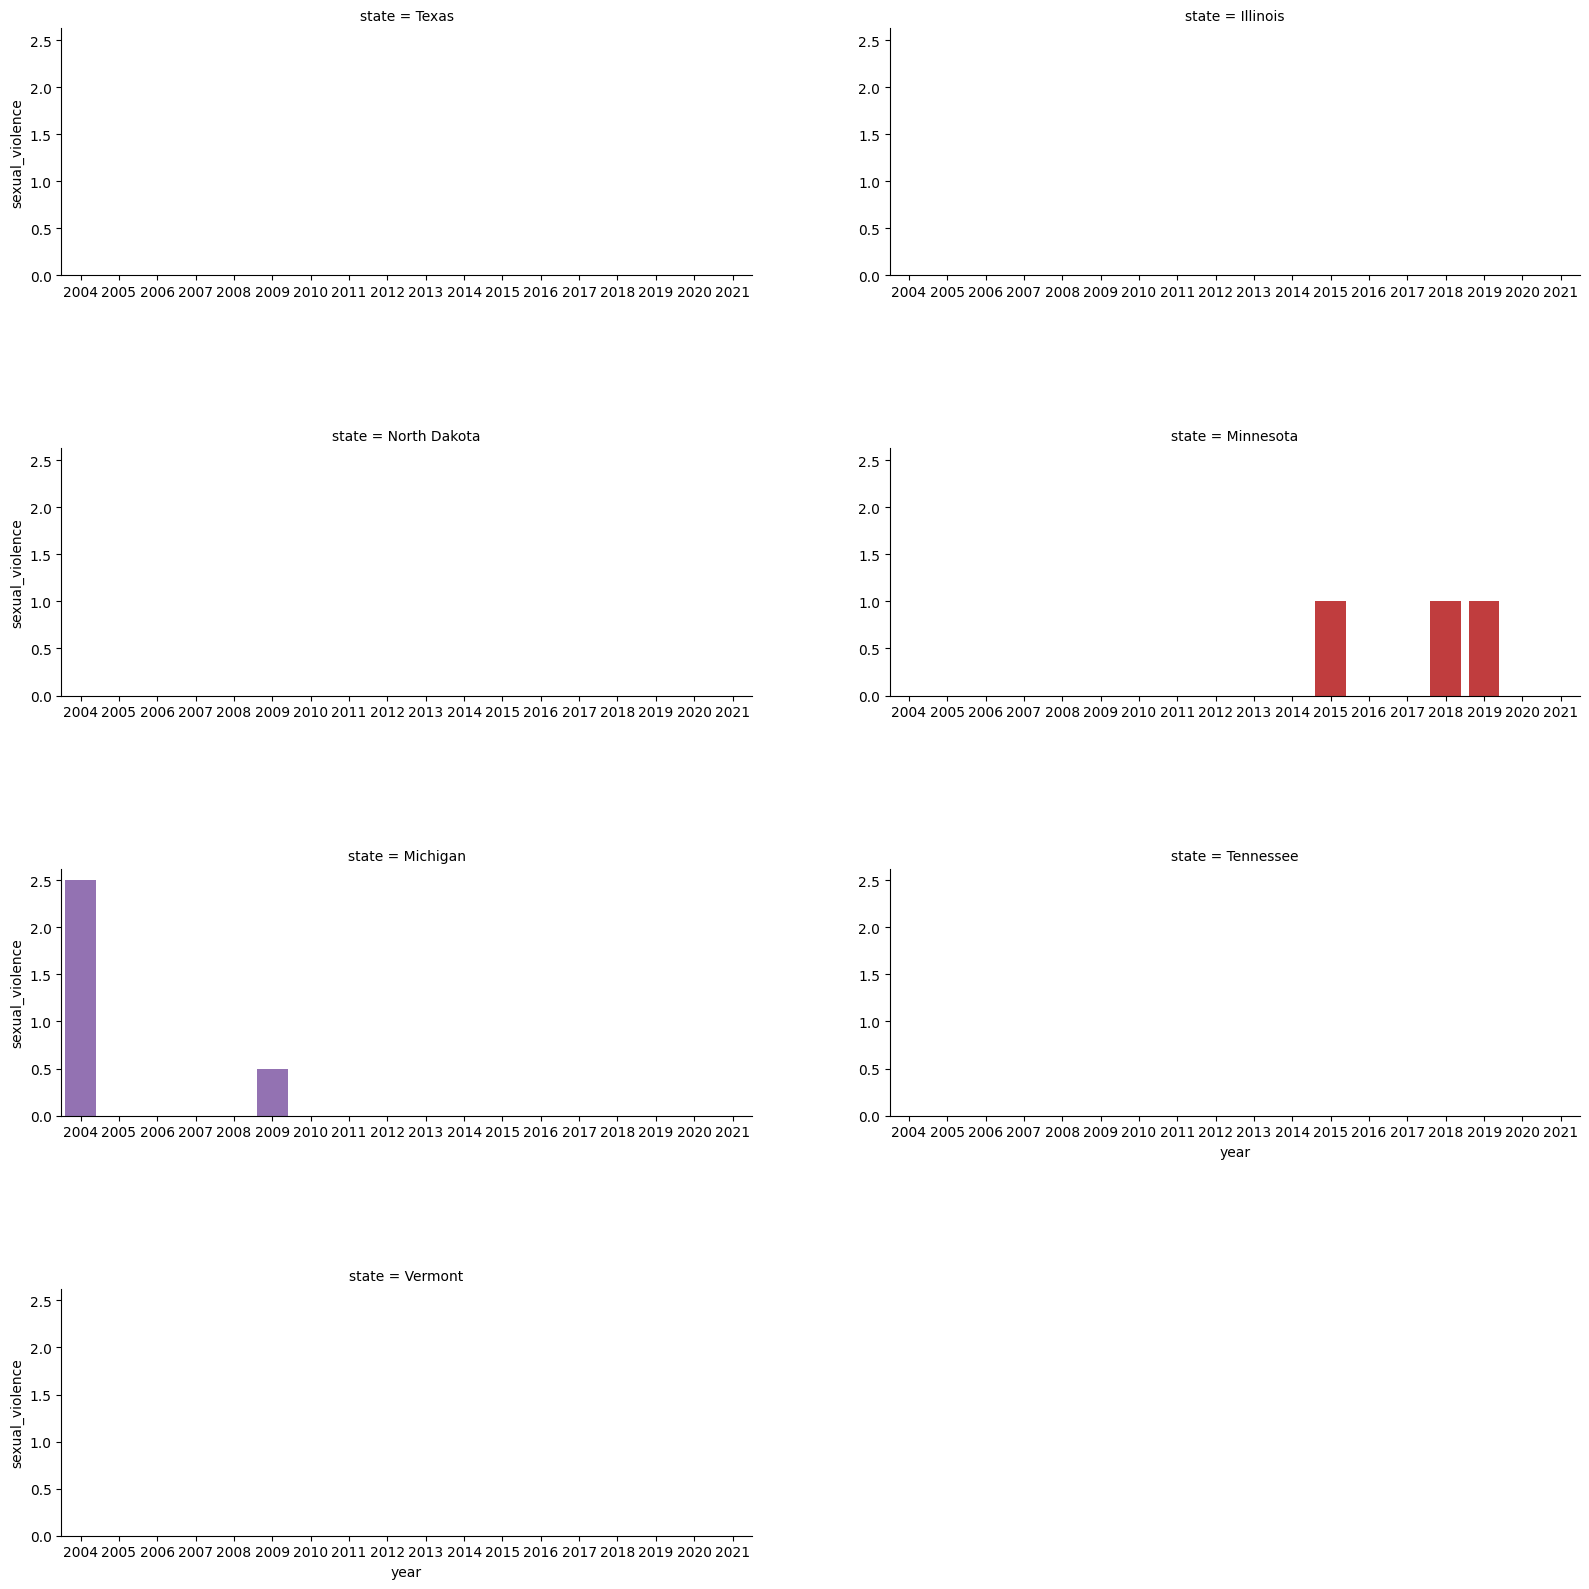

In [23]:
g = sns.FacetGrid(df_combined, 
                  col="state", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="state")


# Make the plot
g = g.map_dataframe(sns.barplot, "year", "sexual_violence")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

In [24]:
google_search_terms = ['abuse', 'sexual_violence', 'domestic_violence', 'rape', 'handgun']
melted_df = pd.melt(df_combined.reset_index(), id_vars=['index', 'state_abbrv', 'state', 'year'], value_vars=google_search_terms)
melted_df

index state_abbrv    state  year variable  value
0        0          TX    Texas  2004    abuse   35.0
1        1          TX    Texas  2005    abuse   29.5
2        2          TX    Texas  2006    abuse   25.0
3        3          TX    Texas  2007    abuse   24.0
4        4          TX    Texas  2008    abuse   23.5
..     ...         ...      ...   ...      ...    ...
625    122          VT  Vermont  2017  handgun    4.0
626    123          VT  Vermont  2018  handgun    4.0
627    124          VT  Vermont  2019  handgun    5.0
628    125          VT  Vermont  2020  handgun    6.0
629    126          VT  Vermont  2021  handgun    3.5

[630 rows x 6 columns]

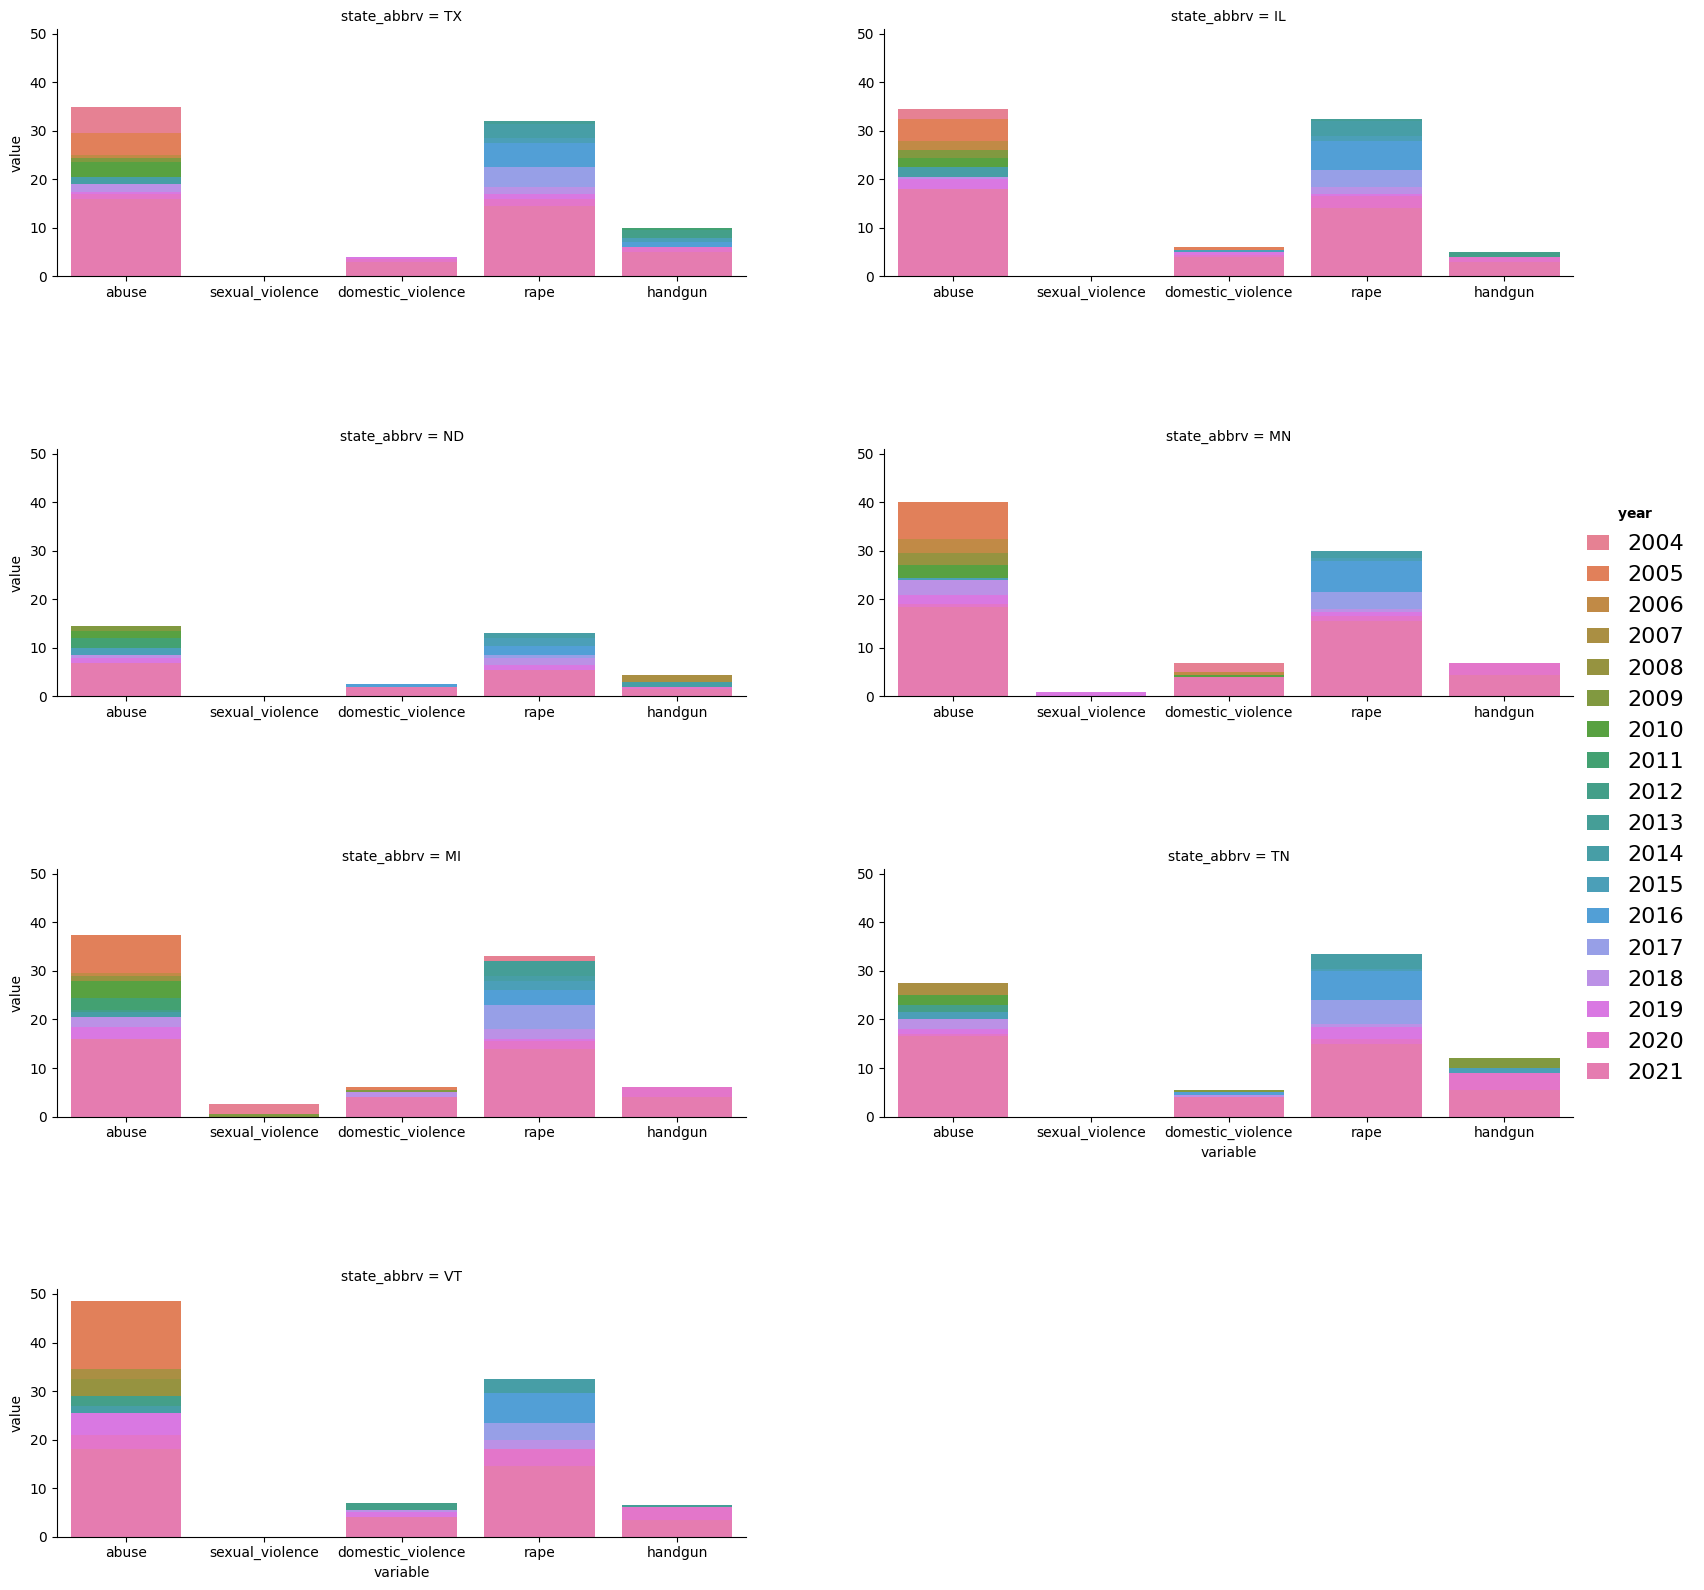

In [25]:
g = sns.FacetGrid(melted_df, 
                  col="state_abbrv", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="year")


# Make the plot
g = g.map_dataframe(sns.barplot, "variable", "value")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

g.add_legend(title='$\\bf{year}$',handlelength=1,prop={'size': 16})

In [26]:
fbi_crime = ['boyfriend_girlfriend', 'spouse', 'homosexual_relationship', 'ex_spouse']
melted_df_fbi = pd.melt(df_combined.reset_index(), id_vars=['index', 'state_abbrv', 'state', 'year'], value_vars=fbi_crime)
melted_df_fbi

index state_abbrv    state  year              variable  value
0        0          TX    Texas  2004  boyfriend_girlfriend   4151
1        1          TX    Texas  2005  boyfriend_girlfriend   5539
2        2          TX    Texas  2006  boyfriend_girlfriend   7947
3        3          TX    Texas  2007  boyfriend_girlfriend   8275
4        4          TX    Texas  2008  boyfriend_girlfriend   8167
..     ...         ...      ...   ...                   ...    ...
499    122          VT  Vermont  2017             ex_spouse     69
500    123          VT  Vermont  2018             ex_spouse     95
501    124          VT  Vermont  2019             ex_spouse     91
502    125          VT  Vermont  2020             ex_spouse     71
503    126          VT  Vermont  2021             ex_spouse     78

[504 rows x 6 columns]

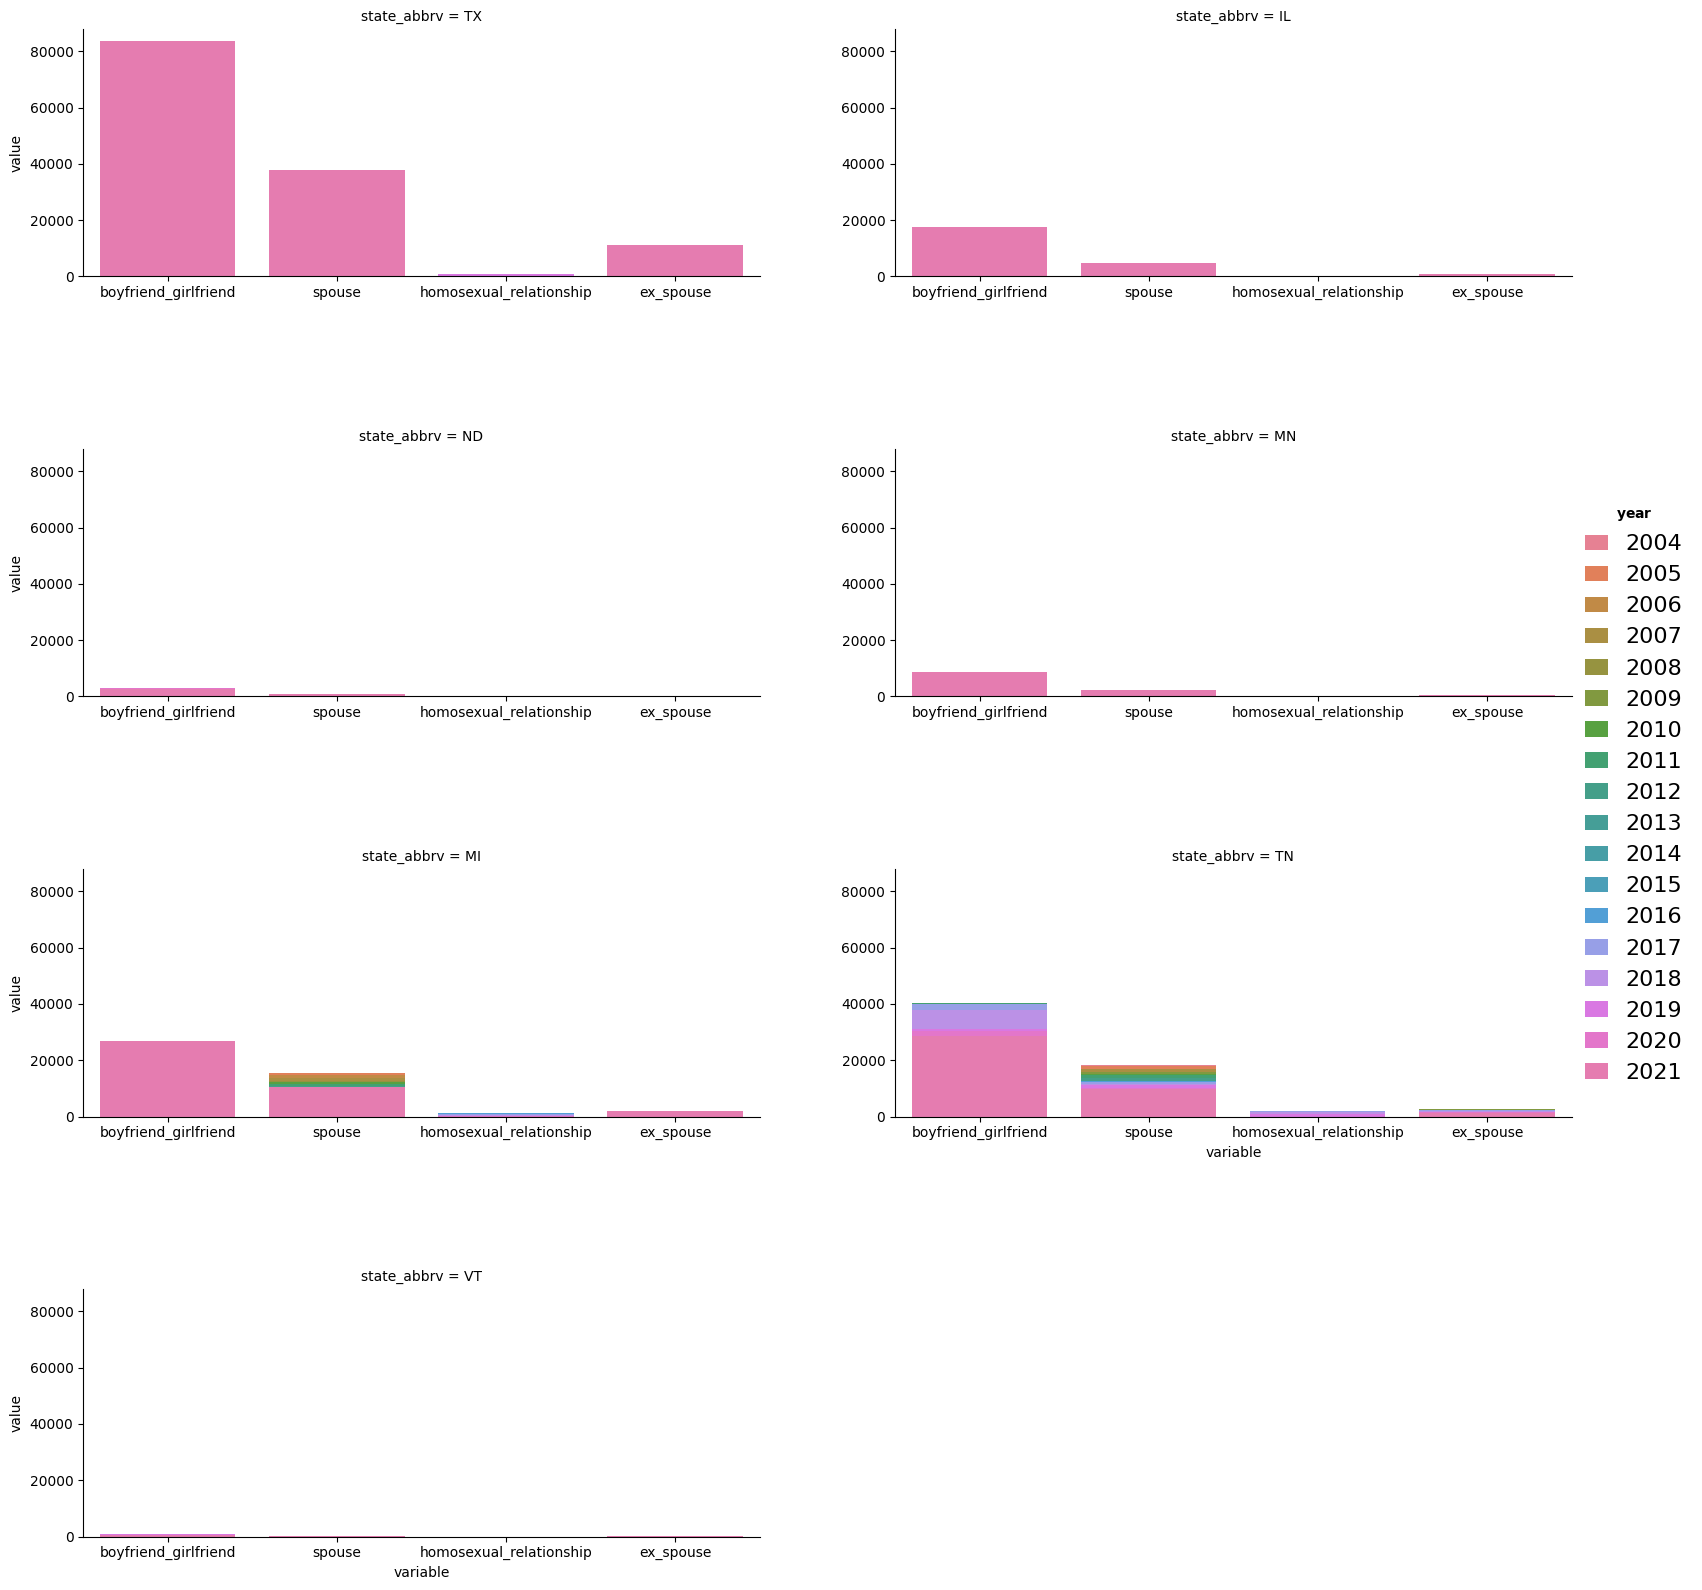

In [27]:
g = sns.FacetGrid(melted_df_fbi, 
                  col="state_abbrv", 
                  col_wrap=2, 
                  height=4, 
                  aspect=2,
                  margin_titles=True,
                  sharex=False,
                  hue="year")


# Make the plot
g = g.map_dataframe(sns.barplot, "variable", "value")

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

g.add_legend(title='$\\bf{year}$',handlelength=1,prop={'size': 16})

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3200: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


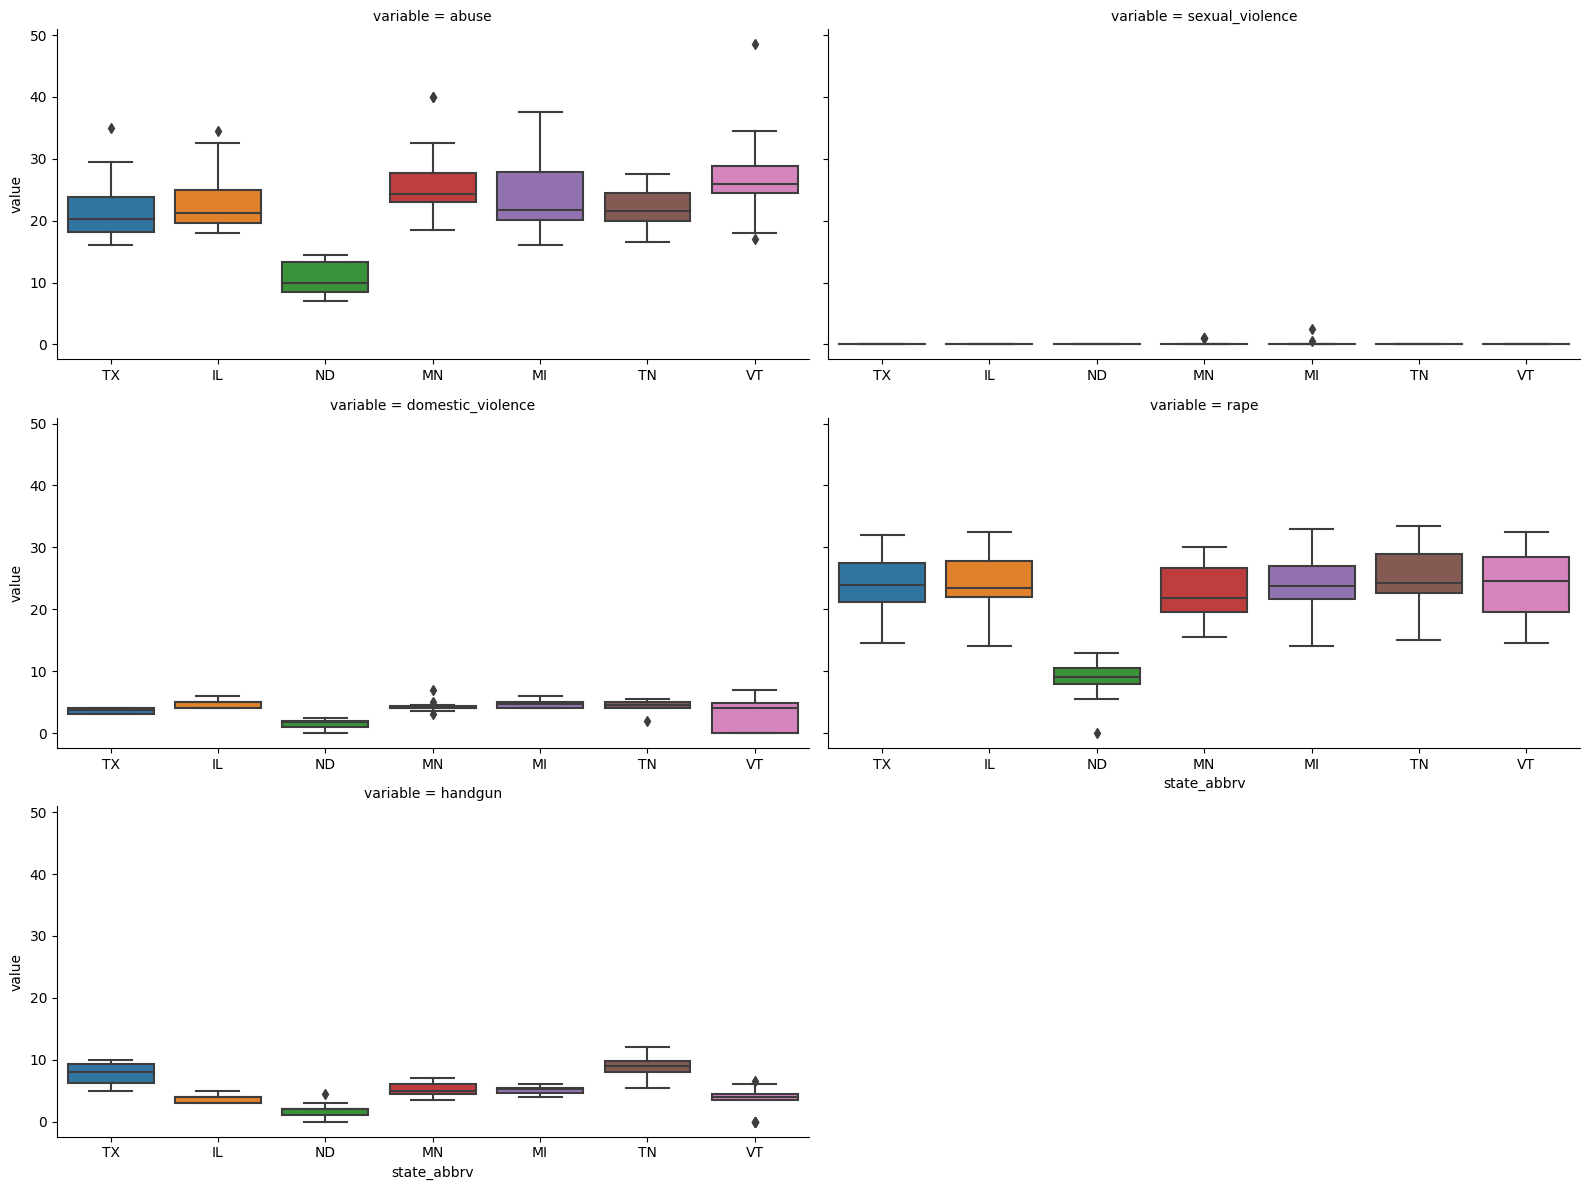

In [28]:
sns.catplot(
    data=melted_df, x='state_abbrv', y='value',
    col='variable', kind='box', col_wrap=2, 
    height=4, aspect=2, margin_titles=True,
    sharex=False                  
)

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3200: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


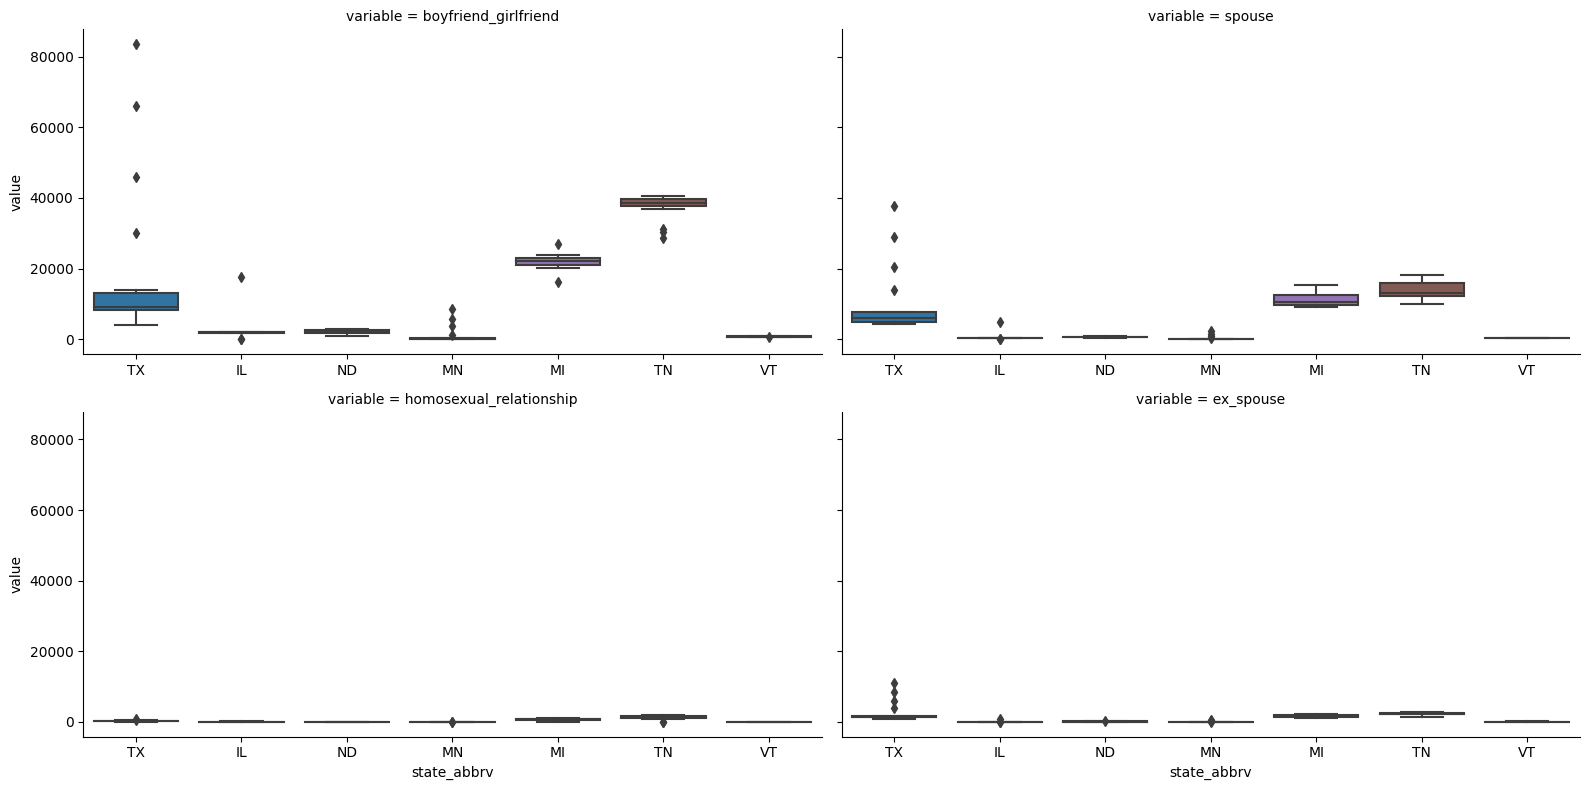

In [29]:
sns.catplot(
    data=melted_df_fbi, x='state_abbrv', y='value',
    col='variable', kind='box', col_wrap=2, 
    height=4, aspect=2, margin_titles=True,
    sharex=False                  
)

# Make some changes to the axes, etc (from seaborn documentation)
g.fig.subplots_adjust(wspace=.2, hspace=.7)
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)

In [30]:
from matplotlib import cm
from matplotlib.pyplot import figure
# with resizing
figure(figsize=(12, 10), dpi=80)

def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)


state_info_fbi = melted_df_fbi.groupby(['state_abbrv'])['value'].sum()
state_info_fbi = state_info_fbi.sort_values(ascending=False)
total = len(state_info_fbi)

# Create a pieplot
plt.pie(state_info_fbi, labels=state_info_fbi.index, autopct=my_fmt, shadow=True)
#plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)
plt.show()

41.79138243198395
27.106228470802307
24.53302890062332
2.494087815284729
2.1888259798288345
1.0954511351883411
0.7909943349659443


In [31]:

state_info_google_trends = melted_df.groupby(['state_abbrv'])['value'].mean()
state_info_google_trends = state_info_google_trends.sort_values(ascending=False)
total = len(state_info_google_trends)
figure(figsize=(12, 10), dpi=80)
# Create a pieplot
plt.pie(state_info_google_trends, labels=state_info_google_trends.index, autopct=my_fmt, shadow=True)
#plot_colortable(mcolors.TABLEAU_COLORS, sort_colors=False, emptycols=2)
plt.show()


16.262611746788025
15.863575041294098
15.705466270446777
15.652763843536377
15.396776795387268
15.020328760147095
6.098479405045509


In [32]:
#v_counts = 
state_info_fbi


state_abbrv
TN    986252
MI    639691
TX    578965
IL     58859
ND     51655
MN     25852
VT     18667
Name: value, dtype: int64

In [33]:
state_info_fbi.index

Index(['TN', 'MI', 'TX', 'IL', 'ND', 'MN', 'VT'], dtype='object', name='state_abbrv')

In [34]:
#FAILED ATTEMPT to stack the dataframe so we can make a contingency table
df_c_stacked = df_combined.copy().stack()
df_c_stacked.to_frame()

0
0   year                                    2004
    boyfriend_girlfriend                    4151
    spouse                                  4474
    ex_spouse                                882
    homosexual_relationship                  127
...                                          ...
126 sexual_violence                          0.0
    dv_total                                1020
    search_total                            40.0
    pop_category                         low_pop
    year2                    2021-01-01 00:00:00

[2016 rows x 1 columns]

In [35]:
#I will try to look at each year individually to create a contingency table
df_2004 = df_combined[df_combined['year']==2004]
df_2004

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
0    2004                  4151    4474        882                      127   
18   2004                     0       0          0                        0   
37   2004                   867     373         66                       14   
55   2004                     0       0          0                        0   
73   2004                 16185   12552       1896                      363   
91   2004                 36796   18172       2719                      840   
109  2004                   656     300         42                       12   

            state state_abbrv  domestic_violence  handgun  rape  abuse  \
0           Texas          TX                4.0      8.0  27.5   35.0   
18       Illinois          IL                6.0      4.0  28.0   34.5   
37   North Dakota          ND                0.0      0.0   0.0   14.5   
55      Minnesota          MN                7.0      3.5  24.0   40.0   
73       Michigan          MI                6.0      5.5  33.0   36.5   
91      Tennessee          TN                5.0     10.5  24.0   26.5   
109       Vermont          VT                0.0      0.0  25.5   26.5   

     sexual_violence  dv_total  search_total pop_category      year2  
0                0.0      9634          74.5     high_pop 2004-01-01  
18               0.0         0          72.5     high_pop 2004-01-01  
37               0.0      1320          14.5      low_pop 2004-01-01  
55               0.0         0          74.5      mid_pop 2004-01-01  
73               2.5     30996          83.5     high_cri 2004-01-01  
91               0.0     58527          66.0     high_cri 2004-01-01  
109              0.0      1010          52.0      low_pop 2004-01-01

<AxesSubplot: xlabel='dv_total', ylabel='state'>

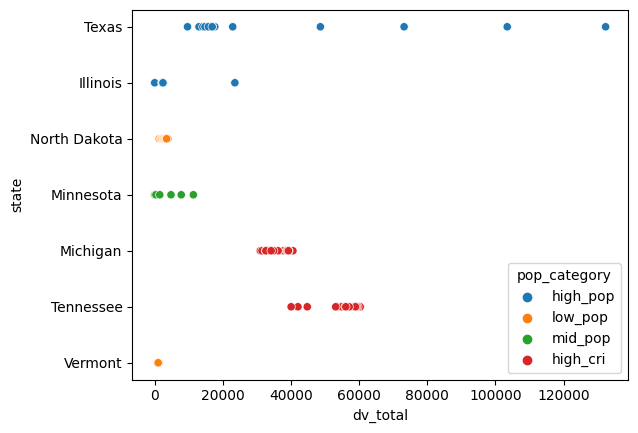

In [36]:
# Scatterplot and violin plot of dv_total versus state, we will have several points per state, one per year recorded.
# Since dv_total and state are different kinds of variables (one is numeric, the other is catgeorical),
# This does not answer the business problem, though... but it does allow us to see SOME kind of correlation
# since we can't make a useful contingency table. 
# Should we consider making dv_total a categorical variable by assigning a HIGH MEDIUM or LOW value. maybe
# based on the proportion of population. 
sns.scatterplot(data=df_combined,x='dv_total',y='state',hue='pop_category')

In [37]:
sns.violinplot(data=df_combined,x='dv_total',y='state',hue='pop_category')

<AxesSubplot: xlabel='dv_total', ylabel='state'>

<AxesSubplot: xlabel='search_total', ylabel='dv_total'>

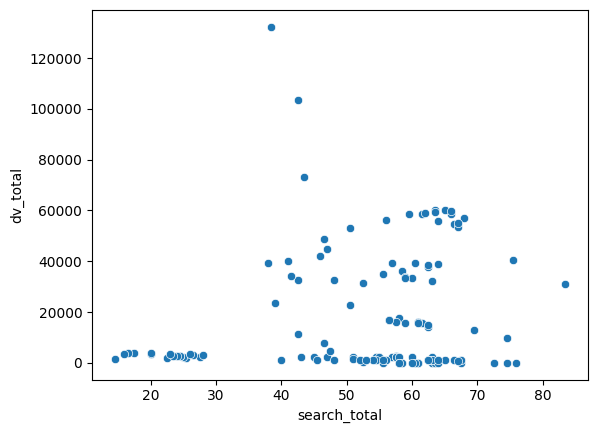

In [38]:
#Creating a scatterplot between dv_total and search_total
sns.scatterplot(data=df_combined,x='search_total',y='dv_total')

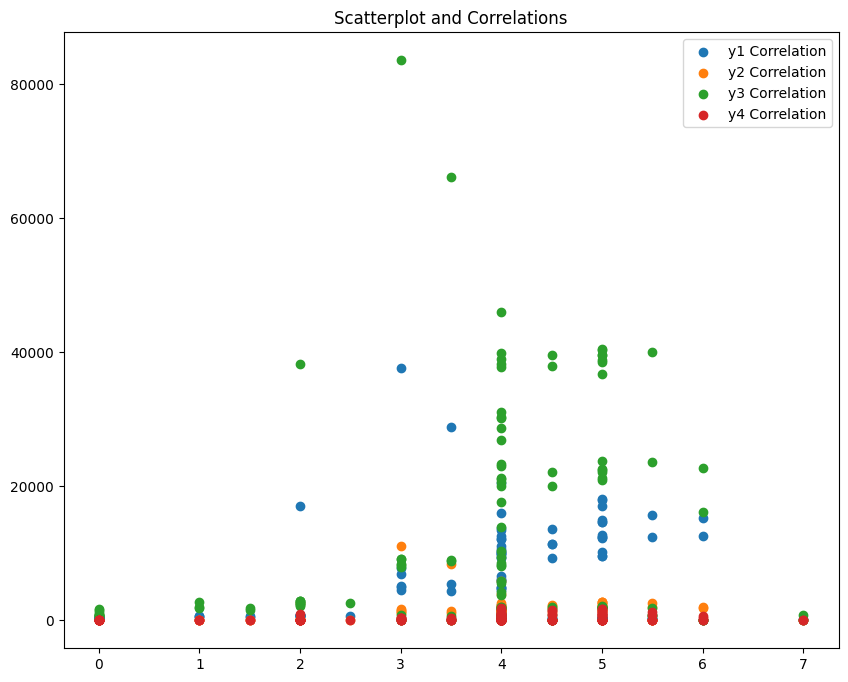

In [39]:
# df_combined_copy = df_combined.copy()
# df_combined_copy.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
# #Creating a scatterplot between dv_total and search_total
# sns.scatterplot(data=df_combined_copy,x=['abuse', 'sexual_violence', 'domestic_violence', 'rape', 'handgun'],y=['boyfriend_girlfriend', 'spouse', 'homosexual_relationship', 'ex_spouse'])

# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_combined['domestic_violence'], df_combined['spouse'], label='y1 Correlation')
plt.scatter(df_combined['domestic_violence'], df_combined['ex_spouse'], label='y2 Correlation')
plt.scatter(df_combined['domestic_violence'], df_combined['boyfriend_girlfriend'], label='y3 Correlation')
plt.scatter(df_combined['domestic_violence'], df_combined['homosexual_relationship'], label='y4 Correlation')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

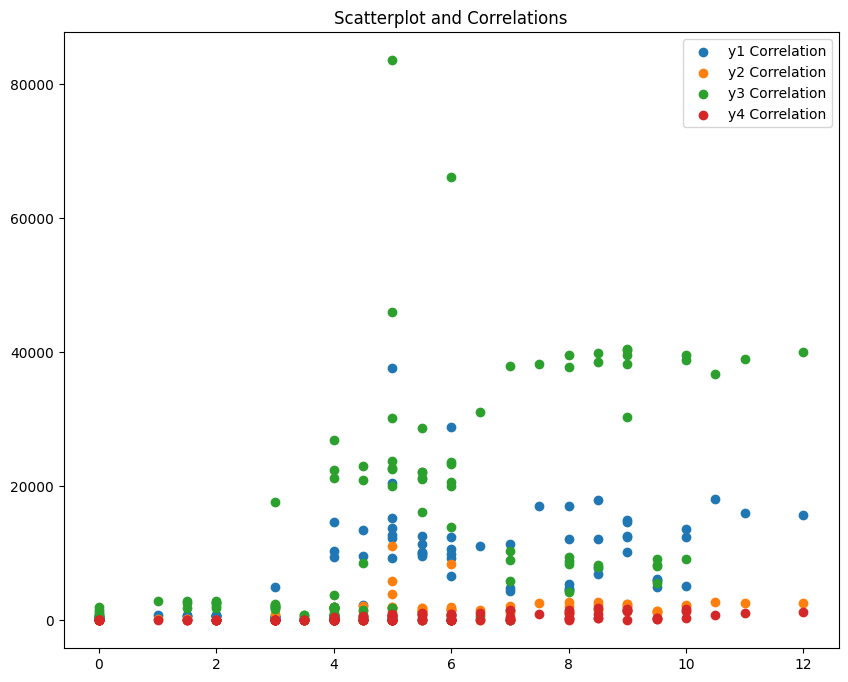

In [40]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_combined['handgun'], df_combined['spouse'], label='y1 Correlation')
plt.scatter(df_combined['handgun'], df_combined['ex_spouse'], label='y2 Correlation')
plt.scatter(df_combined['handgun'], df_combined['boyfriend_girlfriend'], label='y3 Correlation')
plt.scatter(df_combined['handgun'], df_combined['homosexual_relationship'], label='y4 Correlation')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

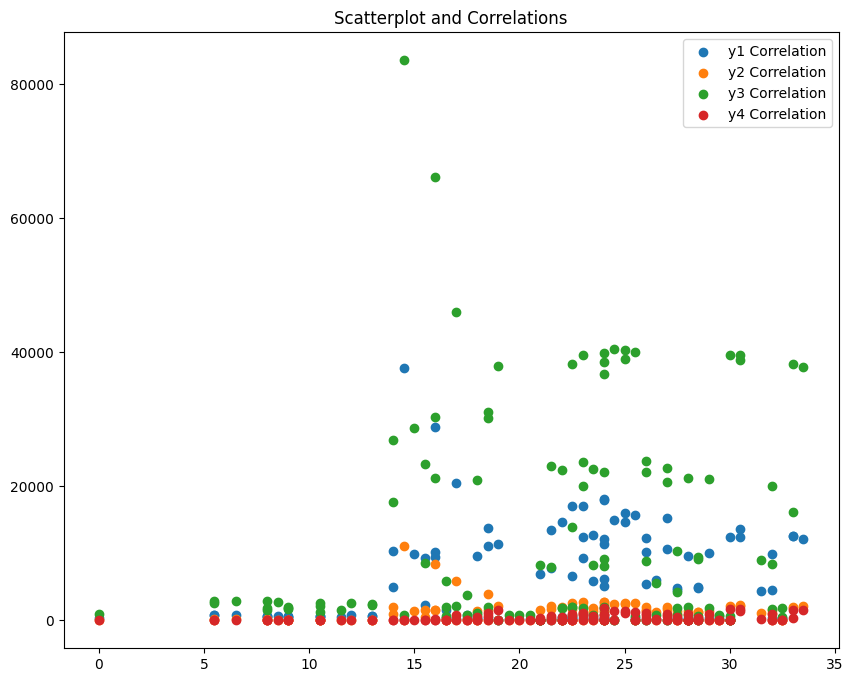

In [41]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_combined['rape'], df_combined['spouse'], label='y1 Correlation')
plt.scatter(df_combined['rape'], df_combined['ex_spouse'], label='y2 Correlation')
plt.scatter(df_combined['rape'], df_combined['boyfriend_girlfriend'], label='y3 Correlation')
plt.scatter(df_combined['rape'], df_combined['homosexual_relationship'], label='y4 Correlation')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

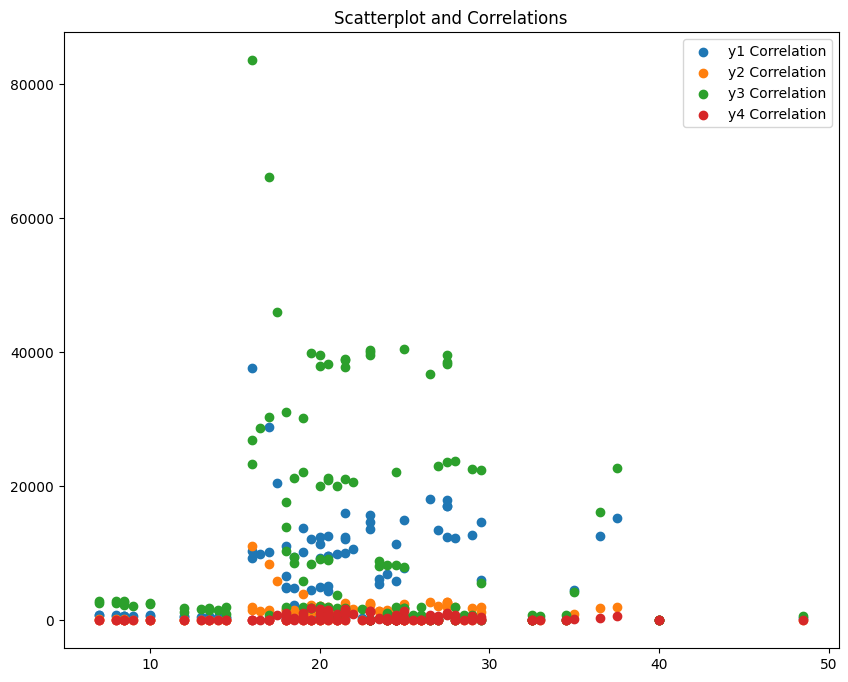

In [42]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_combined['abuse'], df_combined['spouse'], label='y1 Correlation')
plt.scatter(df_combined['abuse'], df_combined['ex_spouse'], label='y2 Correlation')
plt.scatter(df_combined['abuse'], df_combined['boyfriend_girlfriend'], label='y3 Correlation')
plt.scatter(df_combined['abuse'], df_combined['homosexual_relationship'], label='y4 Correlation')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

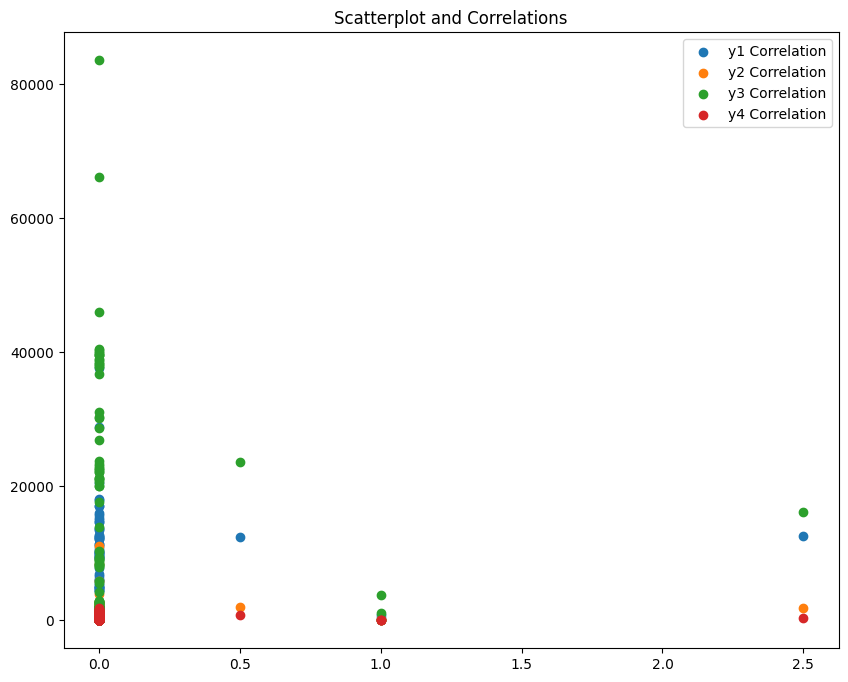

In [43]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df_combined['sexual_violence'], df_combined['spouse'], label='y1 Correlation')
plt.scatter(df_combined['sexual_violence'], df_combined['ex_spouse'], label='y2 Correlation')
plt.scatter(df_combined['sexual_violence'], df_combined['boyfriend_girlfriend'], label='y3 Correlation')
plt.scatter(df_combined['sexual_violence'], df_combined['homosexual_relationship'], label='y4 Correlation')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

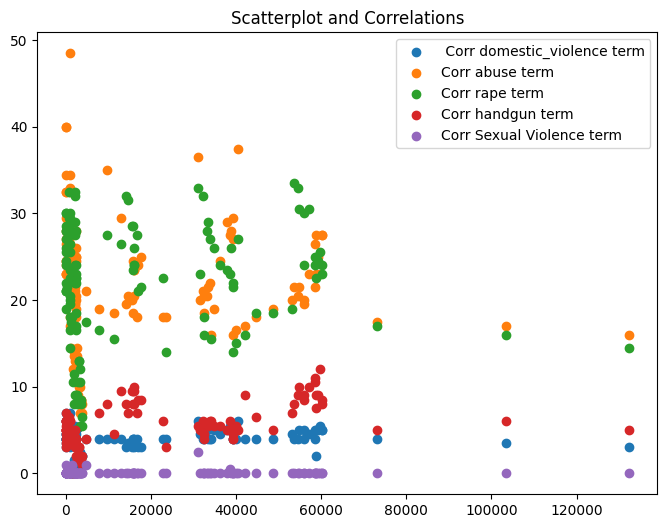

In [44]:
# Plot
#Creating a scatterplot between dv_total and each search term
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df_combined['dv_total'], df_combined['domestic_violence'], label=' Corr domestic_violence term')
plt.scatter(df_combined['dv_total'], df_combined['abuse'], label='Corr abuse term')
plt.scatter(df_combined['dv_total'], df_combined['rape'], label='Corr rape term')
plt.scatter(df_combined['dv_total'], df_combined['handgun'], label='Corr handgun term')
plt.scatter(df_combined['dv_total'], df_combined['sexual_violence'], label='Corr Sexual Violence term')
# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

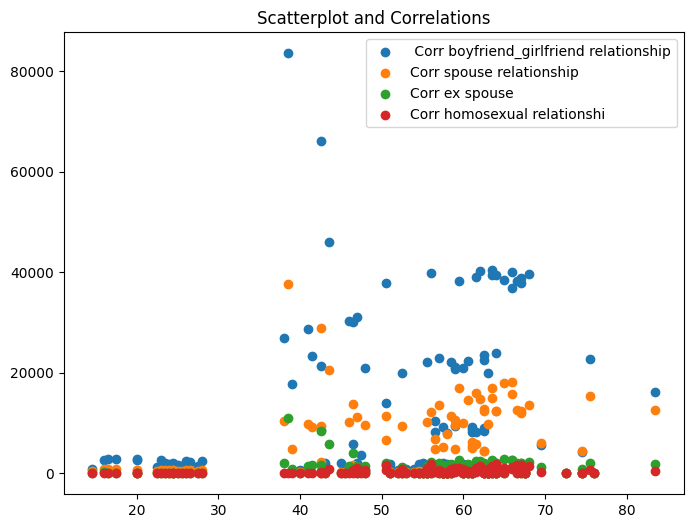

In [45]:
# Plot
#Creating a scatterplot between search_total and each FBI crime data relationship
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.scatter(df_combined['search_total'], df_combined['boyfriend_girlfriend'], label=' Corr boyfriend_girlfriend relationship')
plt.scatter(df_combined['search_total'], df_combined['spouse'], label='Corr spouse relationship')
plt.scatter(df_combined['search_total'], df_combined['ex_spouse'], label='Corr ex spouse')
plt.scatter(df_combined['search_total'], df_combined['homosexual_relationship'], label='Corr homosexual relationshi')

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

In [46]:
#perform a t test to see if there is a relationship (per TA's request)

In [47]:
#determine if we are rejected the null hypothesis or not

In [48]:
#identify if there is any relationship, does not have to be linear (per TA's request)

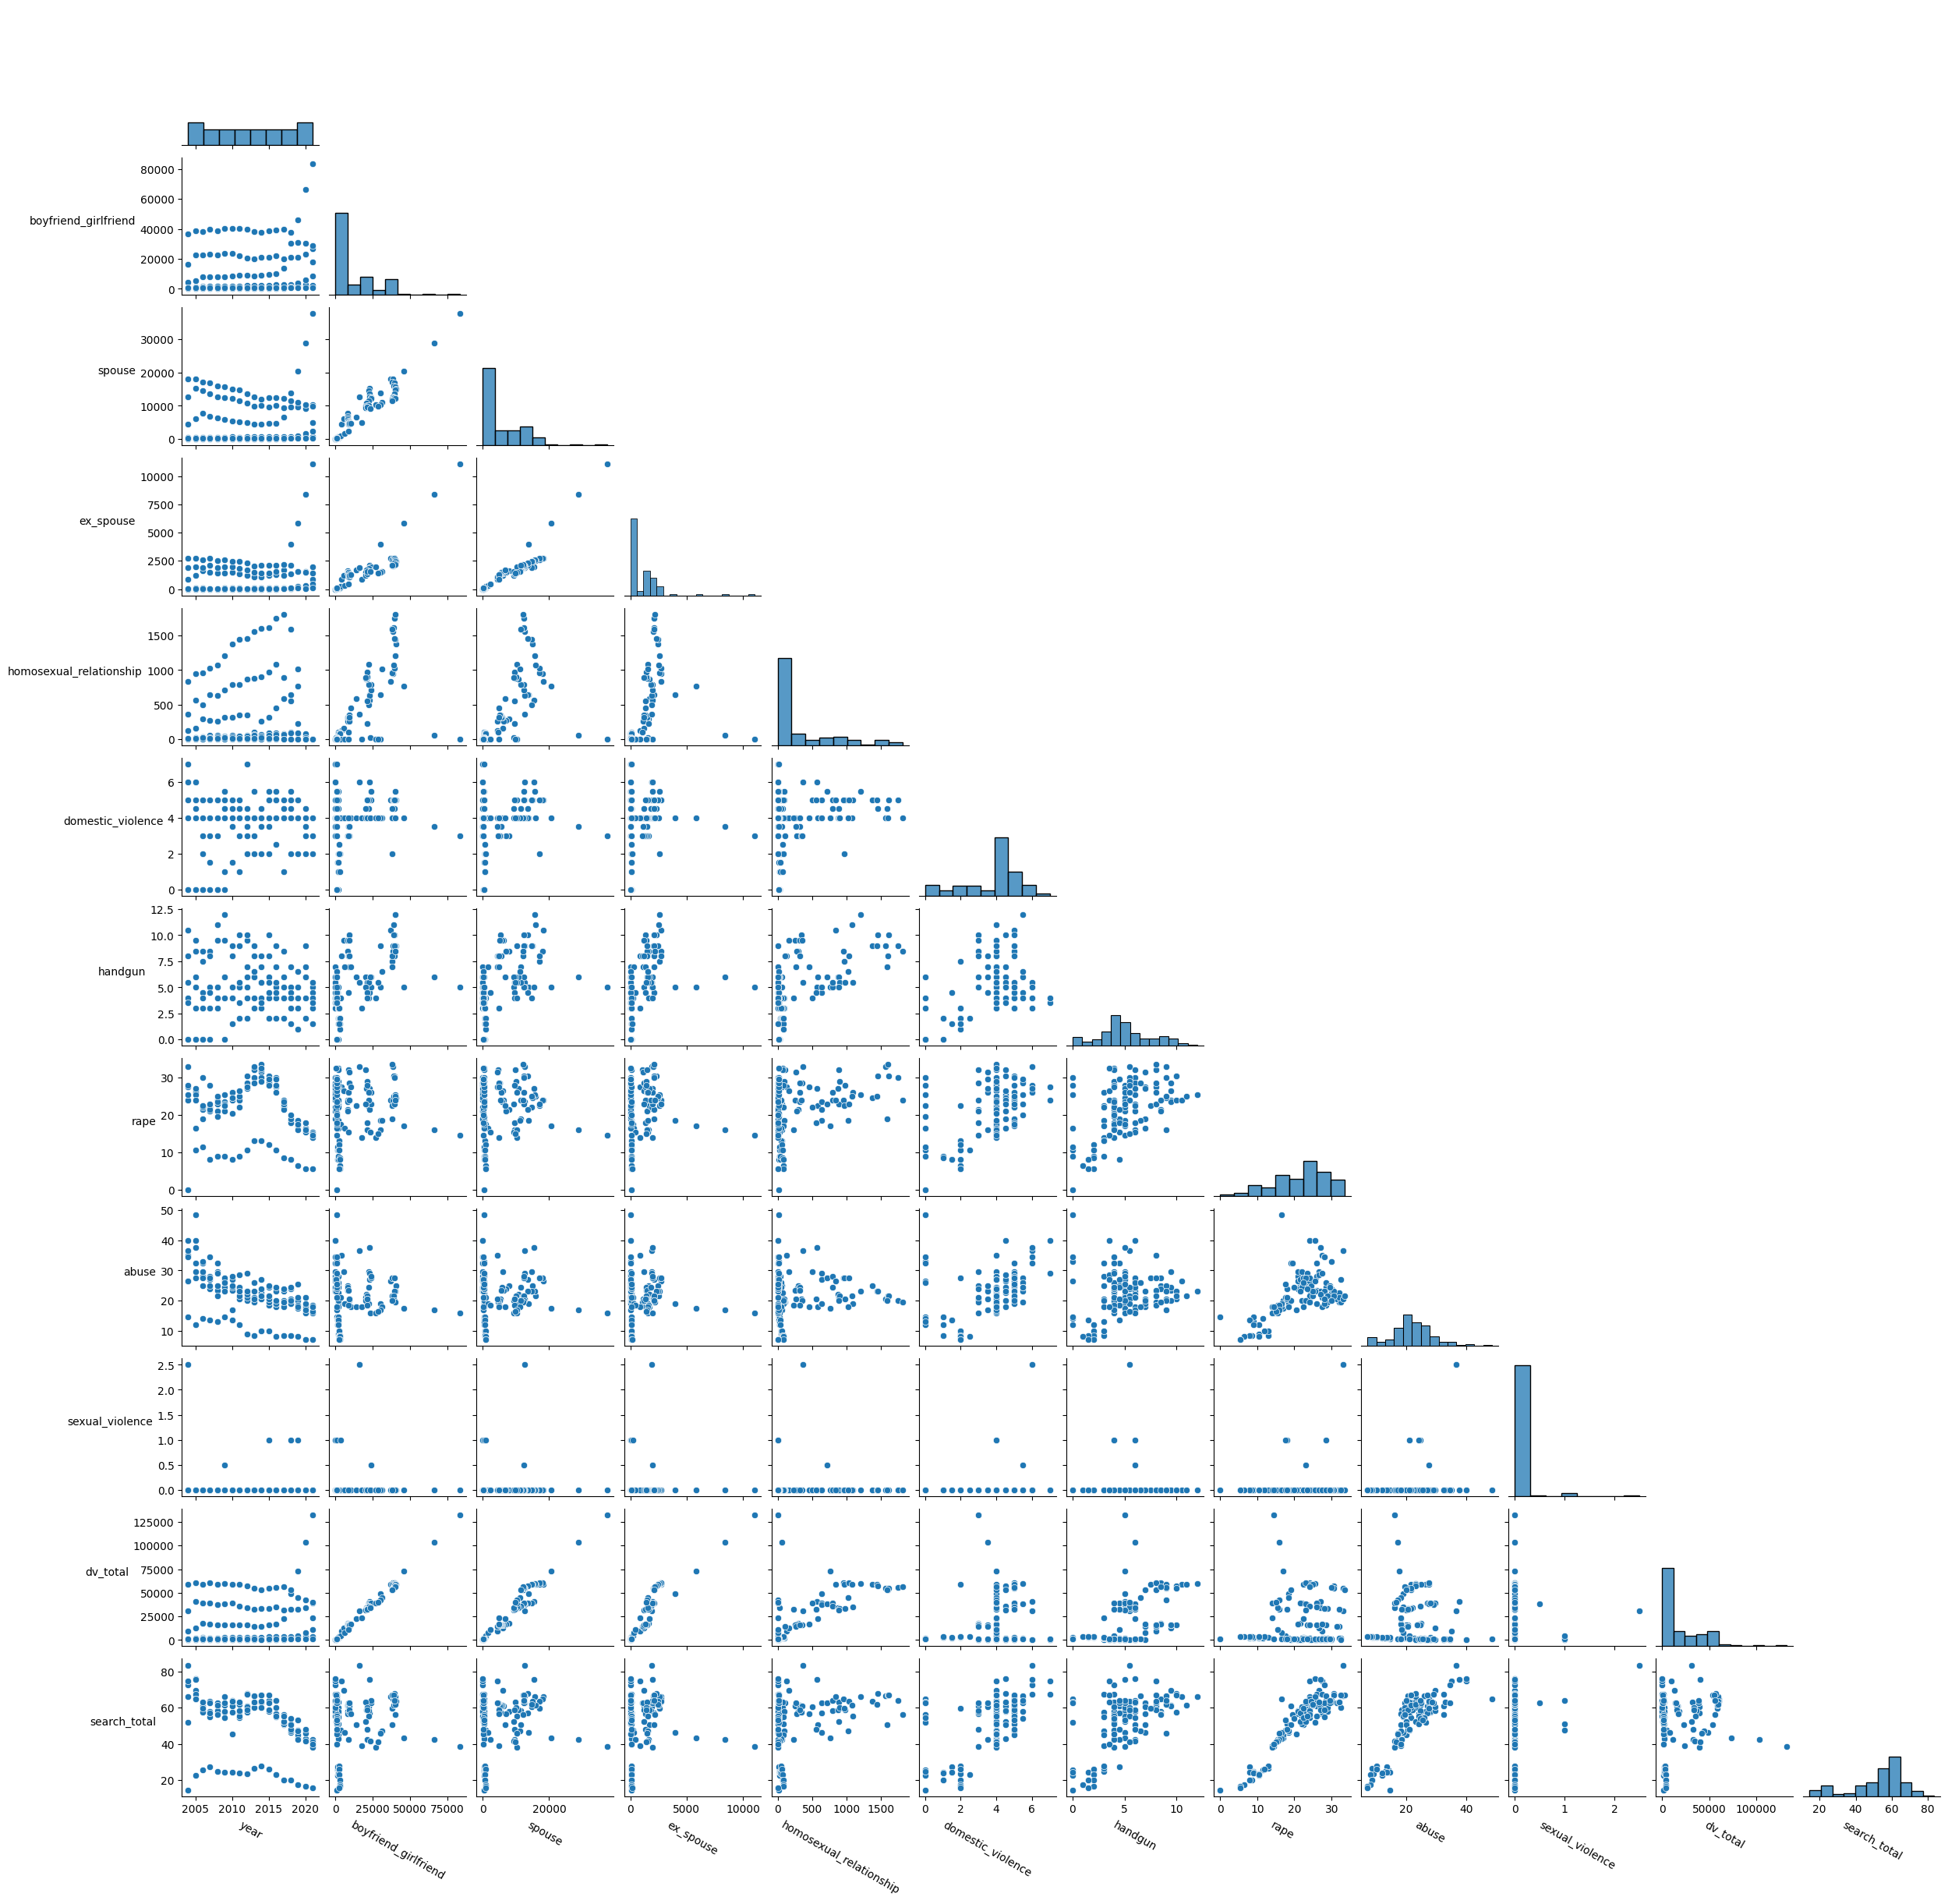

In [49]:
# Select all numeric features and do a scatter plot for quick visual check
data_num_raw = df_combined.select_dtypes(include=np.number)
g = sns.pairplot(data_num_raw, corner=True, height=2)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
g.fig.savefig("Numeric features pairplot before any data treatment.png")

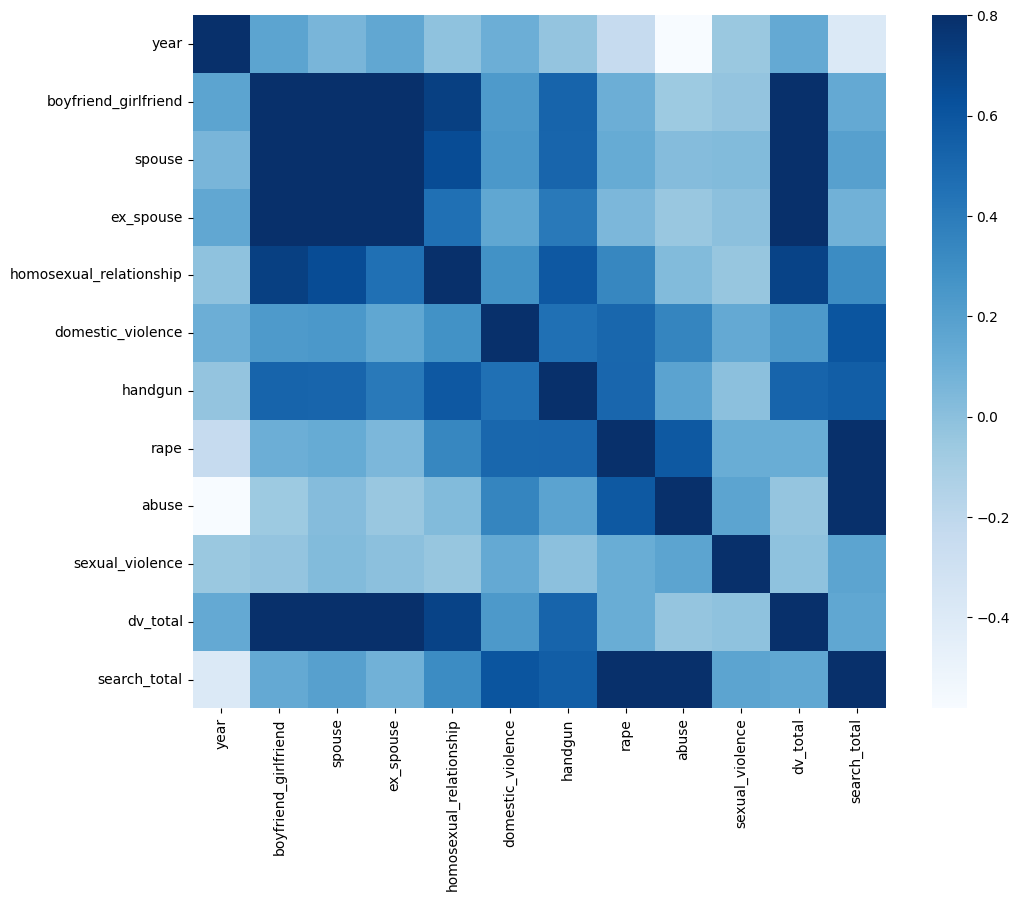

In [50]:
# Failed attempt to plot a heatmap - I decided this is not meaningful and will try some other type of plot.
corrmat = df_combined.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Blues');

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='year', ylabel='dv_total'>

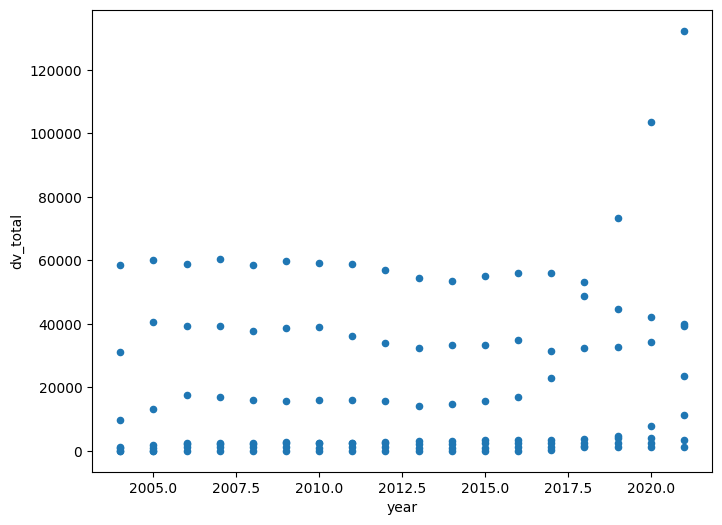

In [51]:
#Failed attempt to plot a scatter, only looking at the FBI crime data to start, aka dv_total

df_combined.plot.scatter(x='year',y='dv_total')

#The multiple dots per year represent the states. I decided it would be beneficial to look at the states
#on separate graphs or in separate colors for the next attempt.

<AxesSubplot: xlabel='year', ylabel='dv_total'>

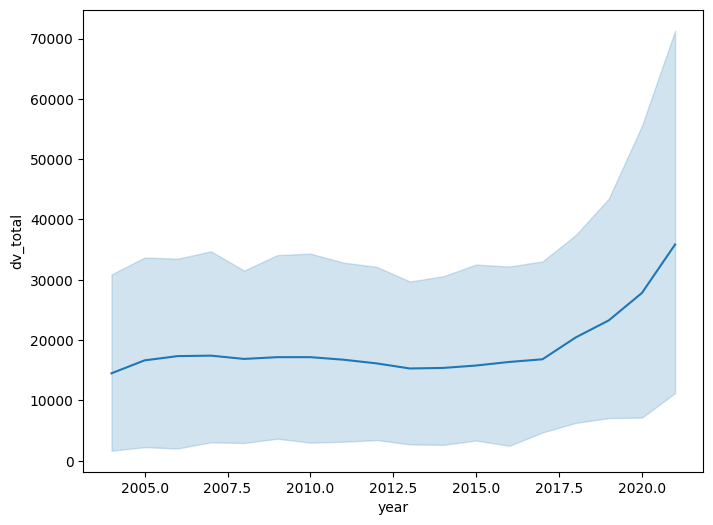

In [52]:
sns.lineplot(data=df_combined, x='year',y='dv_total')

<AxesSubplot: xlabel='year', ylabel='dv_total'>

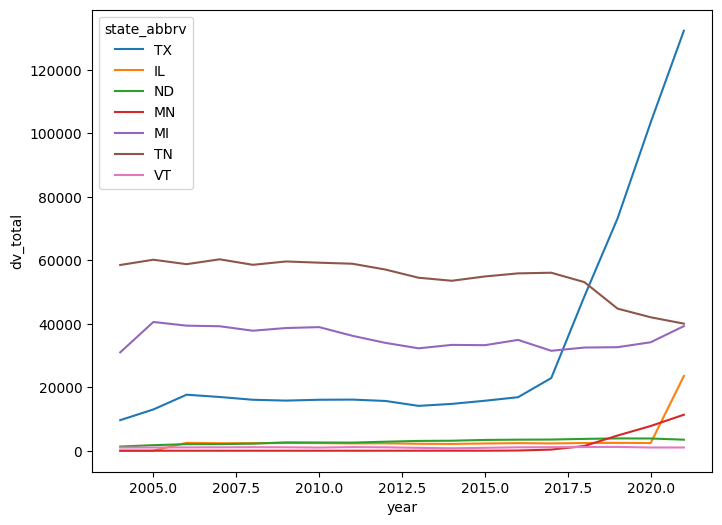

In [53]:
sns.lineplot(data=df_combined, x='year',y='dv_total', hue='state_abbrv')

<AxesSubplot: xlabel='year', ylabel='search_total'>

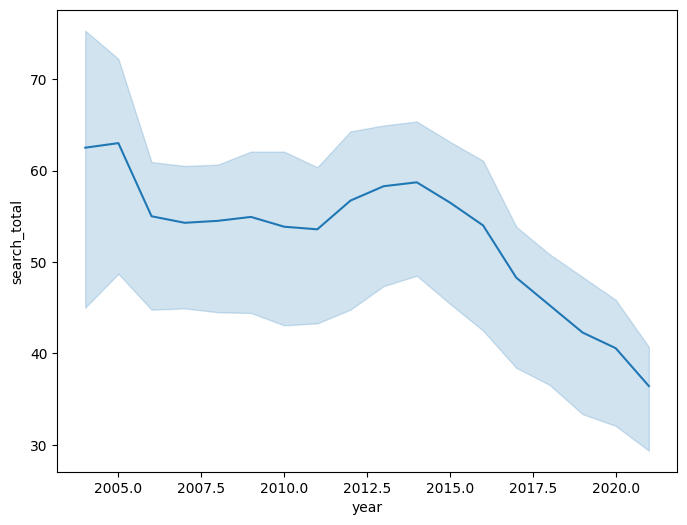

In [54]:
sns.lineplot(data=df_combined, x='year',y='search_total')

<AxesSubplot: xlabel='year', ylabel='search_total'>

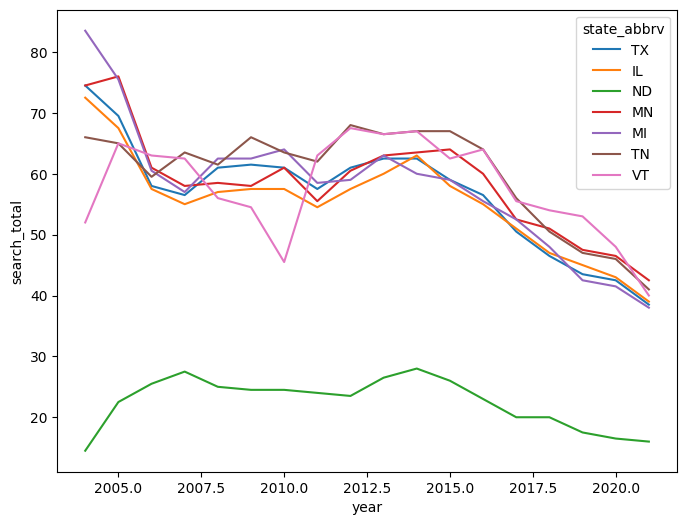

In [55]:
sns.lineplot(data=df_combined, x='year',y='search_total', hue='state_abbrv')

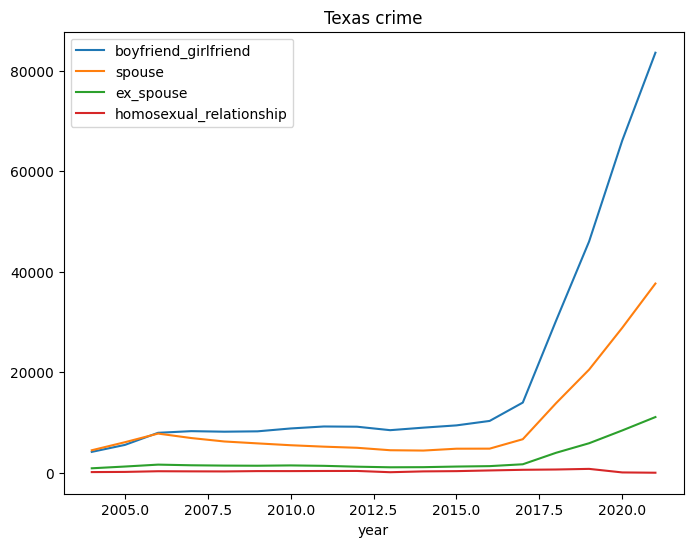

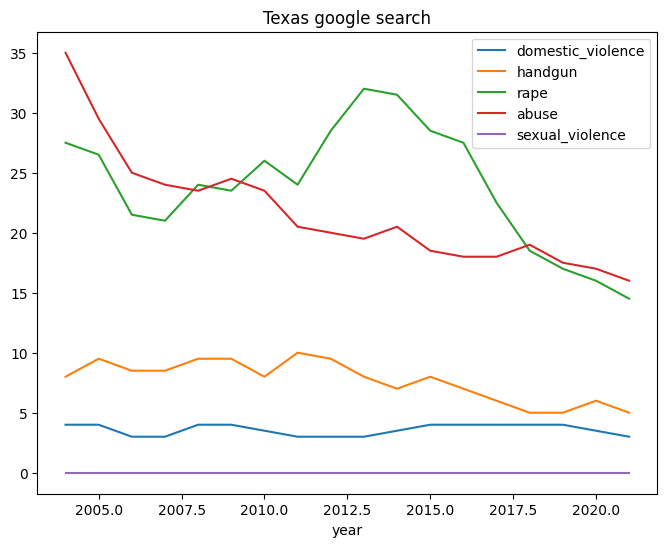

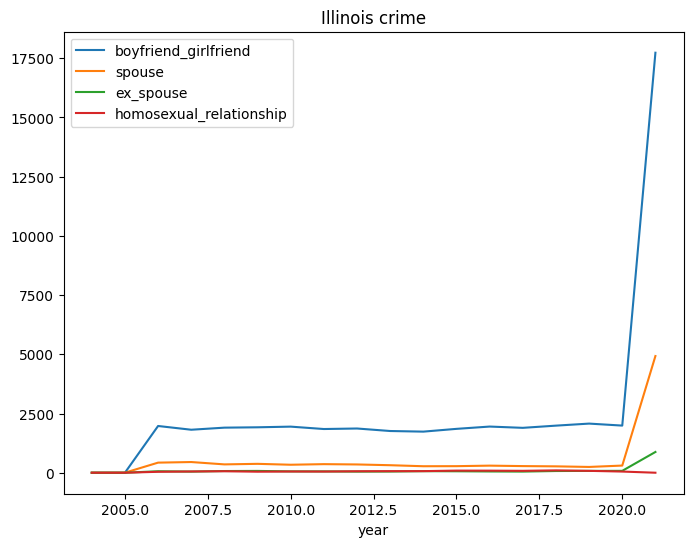

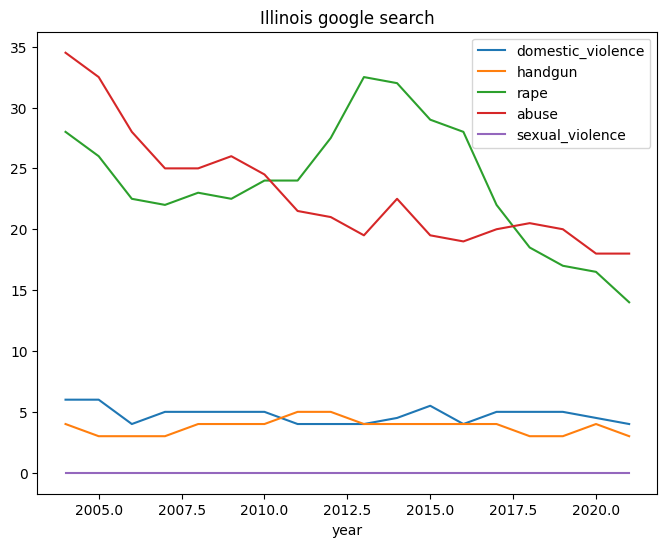

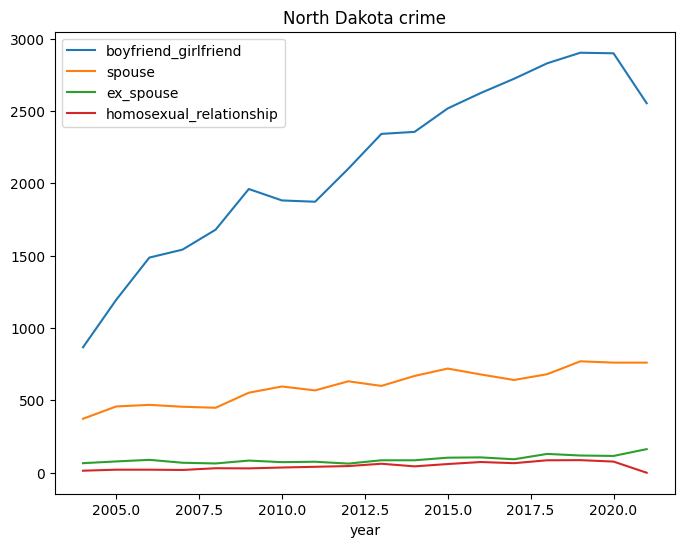

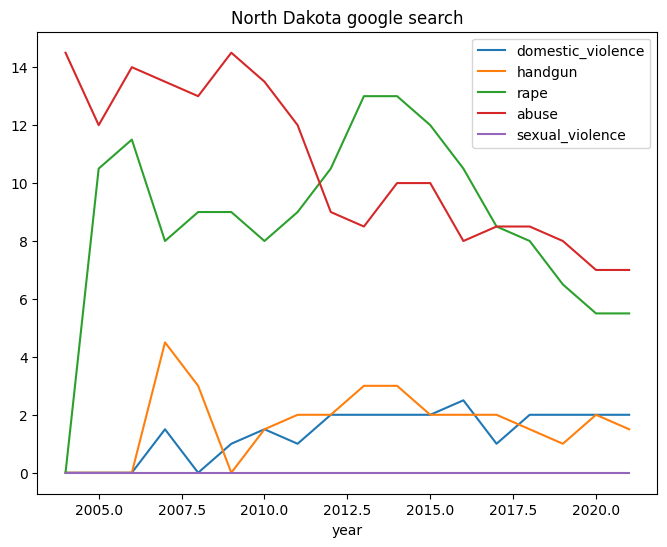

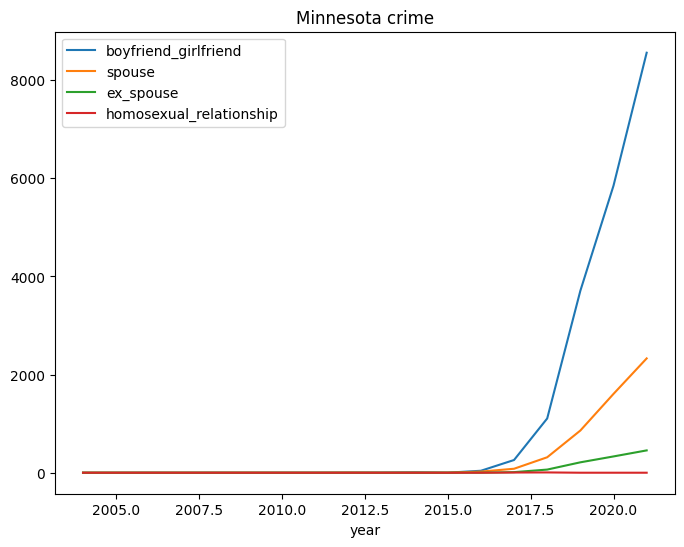

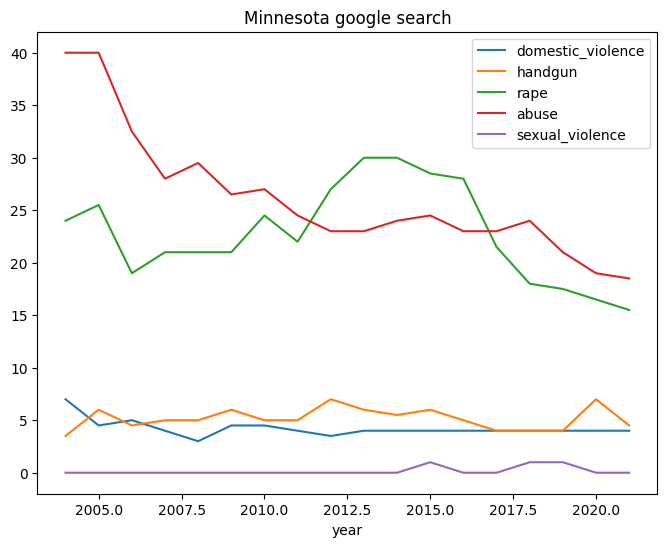

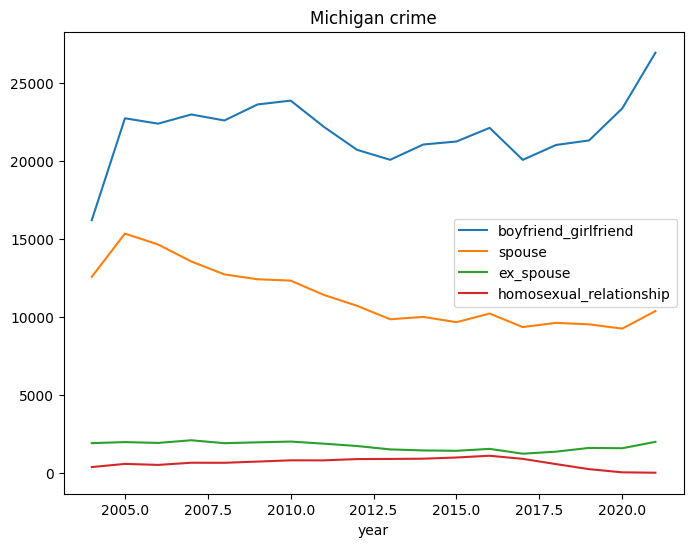

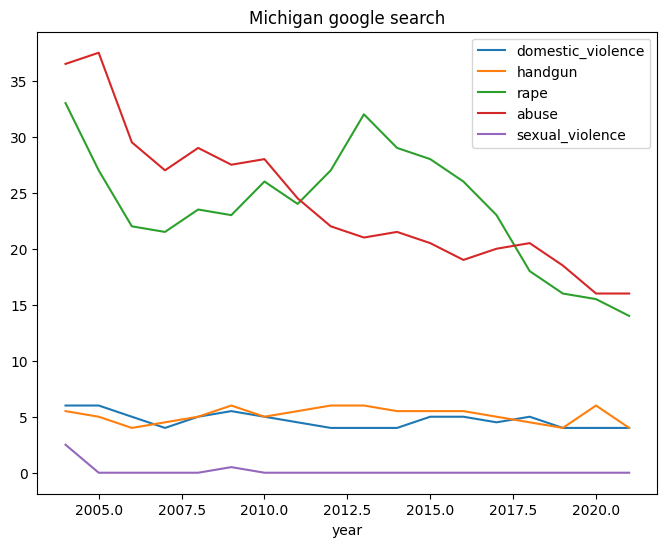

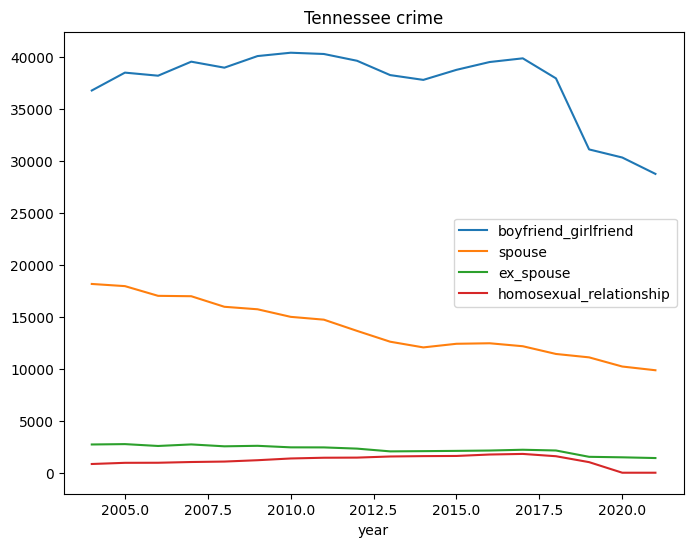

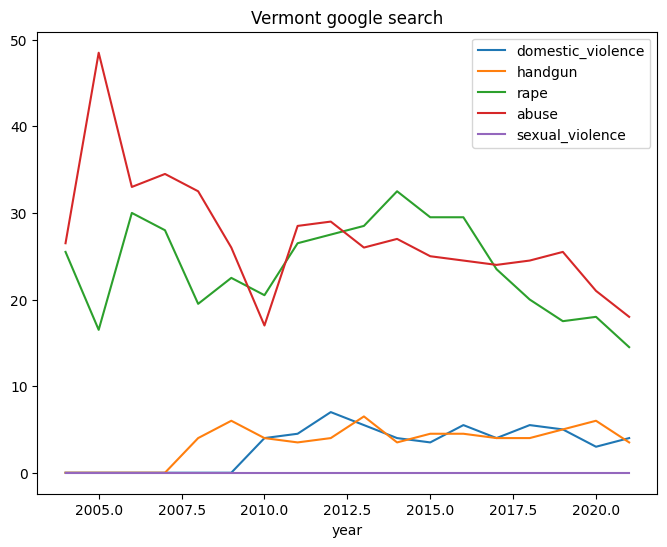

In [56]:
#Line plot for each state, now looking at both FBI crime data aka dv_total
#AND also the google trends data aka search_total, which will require two graphs

#I made a list of all the unique states so I could iterate over them to make two separate graphs for each state
states = list(df_combined['state'].unique())
#we can consider dropping Alaska from the start here using drop

#Create a for loop to go through each state and make the line plots
for s in states:

    state_of_interest = df_combined[df_combined['state']==s] #filter the data to only the state s for each iteration
    
    #make the graph for FBI data
    fig1,ax1 = plt.subplots() #make a new plot object

    for t in dv_relshp: #plot each of the four relationships
        state_of_interest.plot(x='year',y=t,ax=ax1,label=t,title=s + " crime")

    #make the graph for google data
    fig2,ax2 = plt.subplots() #make a new plot object

    for t in dv_terms: #plot each of the five search terms
        state_of_interest.plot(x='year',y=t,ax=ax2,label=t,title=s + " google search")

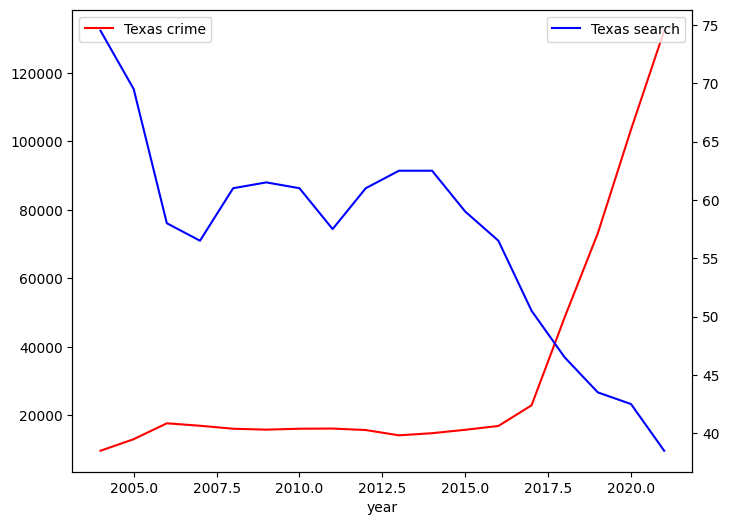

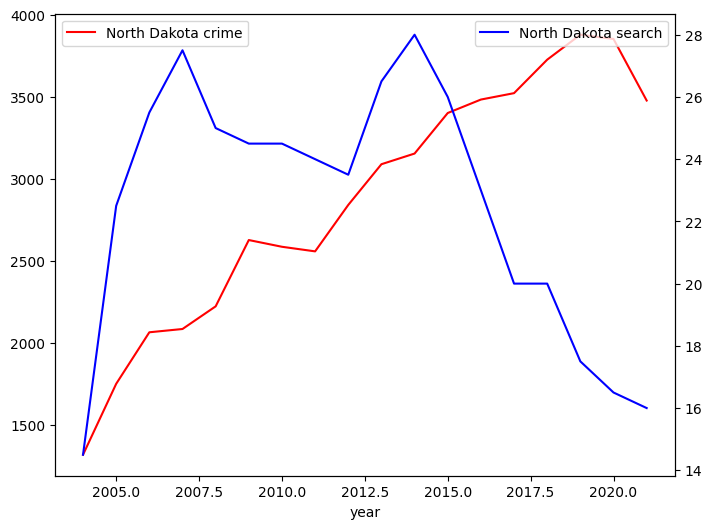

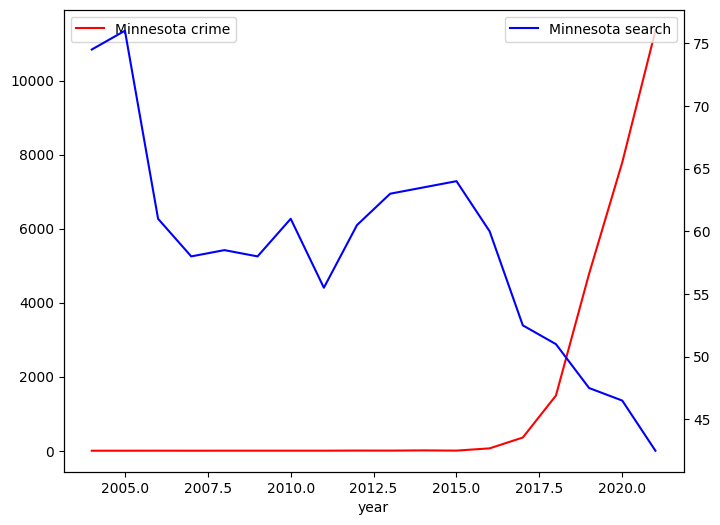

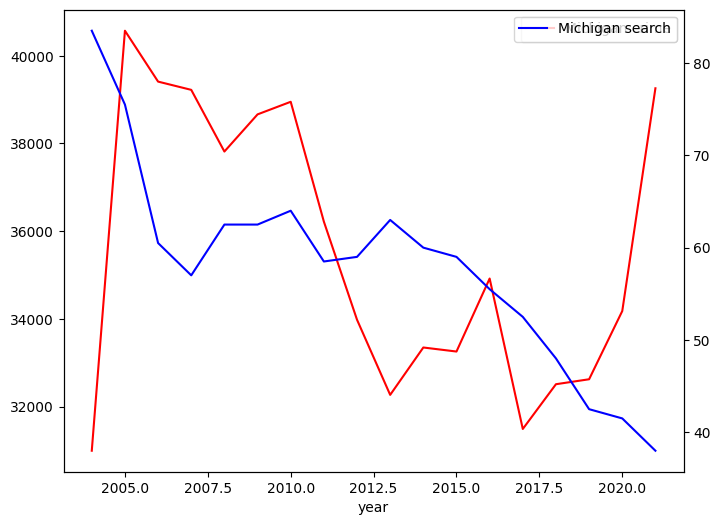

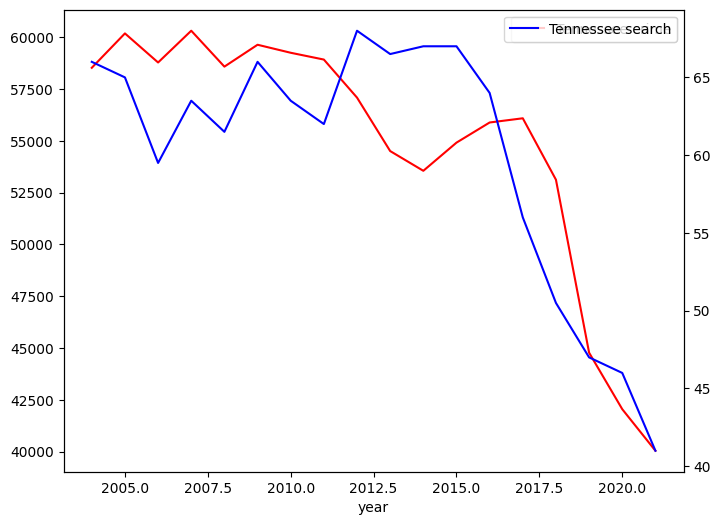

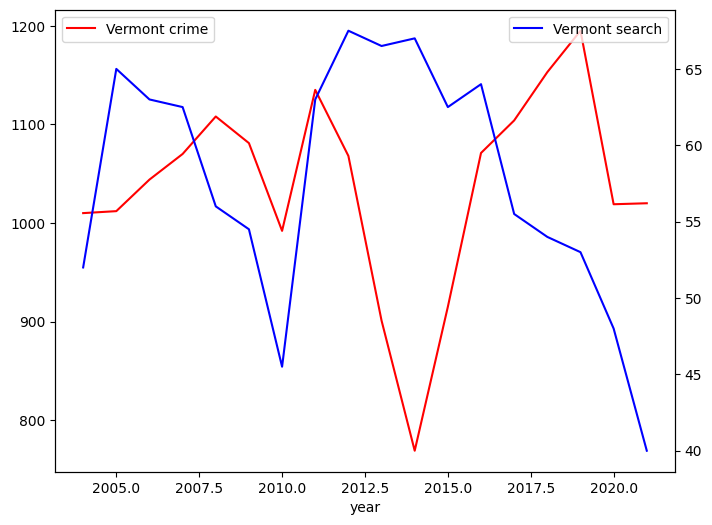

In [57]:
#Successful attempt to plot a line plot for each state, looking at both FBI crime data aka dv_total
#and also the google trends data aka search_total, all on one graph which has two axes.
#I think this could be the most helpful graphs
#Unfortunately, I do not see a relation between the crime data and google searches for most states
#The only promising one is maybe Tennessee?

#Create a for loop to go through each state and make the line plots
for s in states:

    fig1,ax1 = plt.subplots() #make a new plot object
    second_ax1 = ax1.twinx() #create a second y axis

    state_of_interest = df_combined[df_combined['state']==s] #filter the data to only the state s for each iteration

    #make one graph
    state_of_interest.plot(x='year',y='dv_total',ax=ax1,label=s+' crime',c='r')
    state_of_interest.plot(x='year',y='search_total',ax=second_ax1,label=s+' search',c='b')
    #defining what is plotted on each axis, what our label will be, and the color
    #red is dv_total (fbi crime), blue is search_total (google trends)


In [58]:
#Sum up all the states (group by year) and plot that
#consideration: not all states have data for all years available

fig1,ax1 = plt.subplots() #make a new plot object
second_ax1 = ax1.twinx() #create a second y axis

all_states = df_combined.groupby("year").sum().reset_index()
all_states

#make one graph
all_states.plot(x='year',y='dv_total',ax=ax1,label='crime total',c='r', title='All States')
all_states.plot(x='year',y='search_total',ax=second_ax1,label='search total',c='b')
#defining what is plotted on each axis, what our label will be, and the color
#red is dv_total (fbi crime), blue is search_total (google trends)

<AxesSubplot: xlabel='year'>

In [59]:
#define the null hypothesis and alternative hypothesis (per TA's request)
#create a contingency table (per TA's request)
#I can't figure this one out. I don't think our dataset will work for this as is... 

# contingency_table = pd.crosstab(index=df_combined["state"], columns=df_combined["dv_total"])
# contingency_table
df_combined[df_combined['year'] == 2020]

year  boyfriend_girlfriend  spouse  ex_spouse  homosexual_relationship  \
16   2020                 66137   28853       8417                       58   
34   2020                  1990     302         79                       49   
53   2020                  2899     761        116                       77   
71   2020                  5851    1607        332                        0   
89   2020                 23350    9235       1570                       25   
107  2020                 30344   10223       1483                        0   
125  2020                   720     226         71                        2   

            state state_abbrv  domestic_violence  handgun  rape  abuse  \
16          Texas          TX                3.5      6.0  16.0   17.0   
34       Illinois          IL                4.5      4.0  16.5   18.0   
53   North Dakota          ND                2.0      2.0   5.5    7.0   
71      Minnesota          MN                4.0      7.0  16.5   19.0   
89       Michigan          MI                4.0      6.0  15.5   16.0   
107     Tennessee          TN                4.0      9.0  16.0   17.0   
125       Vermont          VT                3.0      6.0  18.0   21.0   

     sexual_violence  dv_total  search_total pop_category      year2  
16               0.0    103465          42.5     high_pop 2020-01-01  
34               0.0      2420          43.0     high_pop 2020-01-01  
53               0.0      3853          16.5      low_pop 2020-01-01  
71               0.0      7790          46.5      mid_pop 2020-01-01  
89               0.0     34180          41.5     high_cri 2020-01-01  
107              0.0     42050          46.0     high_cri 2020-01-01  
125              0.0      1019          48.0      low_pop 2020-01-01

In [60]:
#Calculating the correlation coeficient
np.corrcoef(df_combined['dv_total'],df_combined['search_total'])

array([[1.        , 0.15550179],
       [0.15550179, 1.        ]])

In [61]:
#perform a t test to see if there is a relationship (per TA's request)

dv_total_series = df_combined['dv_total']
search_total_series = df_combined['search_total']

ttest = pingouin.ttest(dv_total_series, search_total_series)
p = ttest['p-val']
p = p[0]
p = float(p)
sig = p < 0.05
print (p, sig)

7.895957600925351e-16 True


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbf2a01f-3e99-4593-9faf-0399a8afaf03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>